# Imports

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt

/home/amirhossein/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
from IPython.display import clear_output

# Getting csv files

In [3]:
# Geting csv files
list_of_files = os.listdir("./")
csv_files = []

for _file in list_of_files:
    if _file.endswith(".csv"):
        csv_files.append(_file)

csv_files

['5_When_rebuilding.csv',
 '1_After_reconstruction.csv',
 '1_When_rebuilding.csv',
 '2_Before_renovation.csv',
 '6_After_reconstruction.csv',
 '2_When_rebuilding.csv',
 '4_Before_renovation.csv',
 '5_After_reconstruction.csv',
 '3_When_rebuilding.csv',
 '3_After_reconstruction.csv',
 '6_Before_renovation.csv',
 '4_After_reconstruction.csv',
 '1_Before_renovation.csv',
 '3_Before_renovation.csv',
 '6_When_rebuilding.csv',
 '2_After_reconstruction.csv',
 '5_Before_renovation.csv',
 '4_When_rebuilding.csv']

# Functions

In [4]:
def slice_signal_by_10_seconds(signal, sampling_rate):
    # Calculate the number of samples corresponding to 10 seconds
    ten_sec_samples = 10 * sampling_rate
    
    # Slice the signal into chunks of 10 seconds
    signal_chunks = [signal[i:i + ten_sec_samples] for i in range(0, len(signal), ten_sec_samples)]
    
    return signal_chunks

In [5]:
def extract_train_out_signal_chunks(signal, sampling_rate):
    '''
    Returns: The first 10-second signal and last 30-second signal which
                sliced by 10 seconds
    '''
    # Calculate the number of samples corresponding to 10 seconds
    ten_sec_samples = 10 * sampling_rate
    
    # Calculate the number of samples corresponding to 30 seconds
    thirty_sec_samples = 30 * sampling_rate
    
    # Get the first 10 seconds of the signal
    first_10_sec = signal[:ten_sec_samples]
    
    # Get the last 30 seconds of the signal
    last_30_sec = signal[-thirty_sec_samples:]
    
    # Split the last 30 seconds into chunks of 10 seconds
    chunks_last_30_sec = slice_signal_by_10_seconds(last_30_sec, sampling_rate)
    
    return first_10_sec, chunks_last_30_sec

In [6]:
def dir_creator(csv_file_name):
    '''
    Creating directoies for each column of csv files
        to save heatmaps into them
    '''
    sensor_number = csv_file_name.split('_')[0]
    file_name = csv_file_name.split('.')[0]

    # Define the sensor directory name
    sensor_dir = f"sensor_{sensor_number}"

    if not os.path.exists(sensor_dir):
        os.mkdir(sensor_dir)
    
    # Change directory to the sensor directory
    os.chdir(sensor_dir)
    
    # Create the main directory for the current file
    if not os.path.exists(file_name):
        os.mkdir(file_name)
        os.mkdir(f"{file_name}/train_out")
        os.mkdir(f"{file_name}/train_in")

    # Change back to the original directory
    os.chdir("..")

In [7]:
def save_heatmap(csv_file_name, column, counter, train_status):
    '''
    Saving plots in png format in their specific path
    '''
    no_ext_csv_file_name = csv_file_name.split('.')[0]
    sensor_number = csv_file_name.split('_')[0]
    sensor_dir = f"sensor_{sensor_number}"
    
    path = f"{sensor_dir}/{no_ext_csv_file_name}/{train_status}/{sensor_number}_{no_ext_csv_file_name}_{column}_{counter}.png"
    plt.savefig(path , bbox_inches='tight', pad_inches=0)

In [9]:
def signal_to_heatmap(signal):
    '''
    Returns the heatmap of signal
    ToDo: may have to change the size of images
    '''
    # Desired size in pixels
    width_px = 50
    height_px = 50

    # DPI (dots per inch)
    dpi = 80

    # Convert to inches
    width_in = width_px / dpi
    height_in = height_px / dpi

    # Set the size of the heatmap
    fig = plt.figure(figsize=(width_in, height_in), dpi=dpi)
    ax = fig.add_subplot()
    ax.axis('off')
    
    sns.heatmap(signal, xticklabels=False, yticklabels=False, cbar=False)

In [13]:
def remove_five_zeros(arr):
    """Remove sequences of 5 successive zeros from an array."""
    result = []
    zero_count = 0

    for i in range(len(arr)):
        if arr[i] == 0:
            zero_count += 1
        else:
            if zero_count == 5:
                result = result[:-5]  # Remove the last 5 zeros from the result
            zero_count = 0
            result.append(arr[i])
        
        # If we've reached the end and have exactly 5 zeros at the end
        if i == len(arr) - 1 and zero_count == 5:
            result = result[:-5]
    
    return np.array(result)

In [14]:
def plot_signal(signal, sampling_rate=825.8, title="Signal Plot", xlabel="Time", ylabel="Amplitude"):
    """
    Plots a one-dimensional signal.

    Parameters:
    - signal: List or array-like, the 1D signal to plot.
    - sampling_rate: Sampling rate of the signal (default is 825.8).
    - title: Title of the plot (default is "Signal Plot").
    - xlabel: Label for the x-axis (default is "Time").
    - ylabel: Label for the y-axis (default is "Amplitude").
    """
    # Create time vector based on the length of the signal and the sampling rate
    time = [i / sampling_rate for i in range(len(signal))]
    
    # Plot the signal
    plt.figure(figsize=(10, 5))
    plt.plot(time, signal, label='Signal', color='b', linewidth=1.5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
# Reading files
df = pd.read_csv("./1_After_reconstruction.csv")

# Nan to zero
df = df.fillna(0)
    
# Loading each column of df into dict
columns_dict = {}
for col in df.columns:
    columns_dict[col] = df[col].to_numpy()
# Removing first incremental column
columns_dict.pop('Unnamed: 0')

In [22]:
# Initializing fs
fs=825.8

Signal length in seconds: 50.99418745458949 (s)


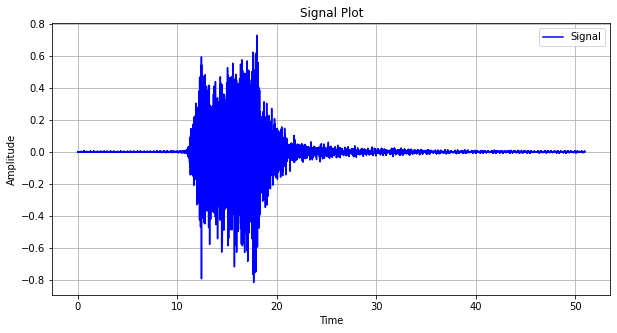

------------------------------



Signal length in seconds: 46.995640590942116 (s)


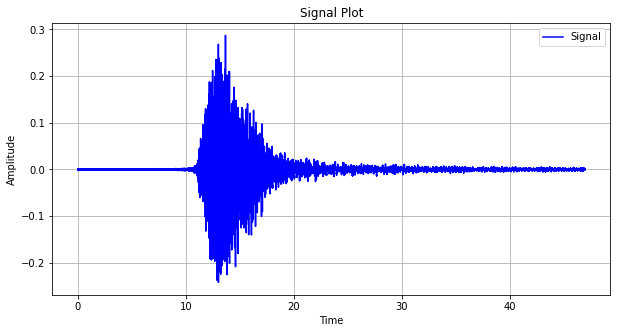

------------------------------



Signal length in seconds: 67.98861709857108 (s)


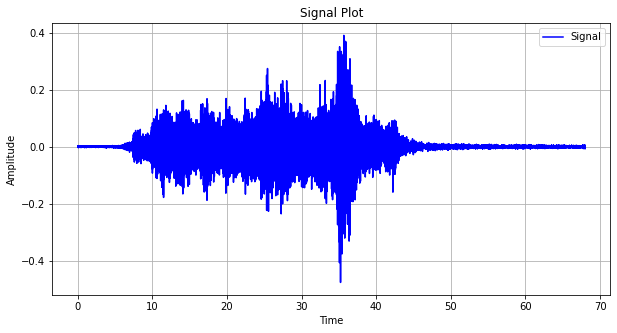

------------------------------



Signal length in seconds: 58.99128118188424 (s)


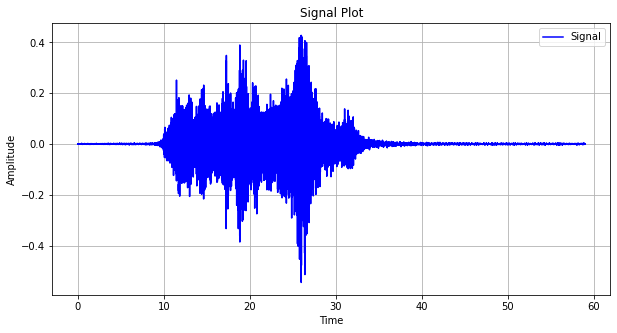

------------------------------



Signal length in seconds: 44.996367159118435 (s)


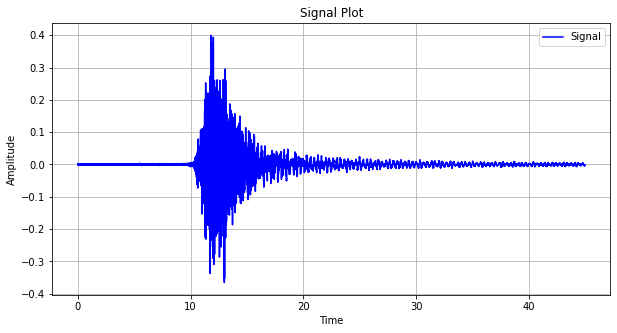

------------------------------



Signal length in seconds: 49.99515621215791 (s)


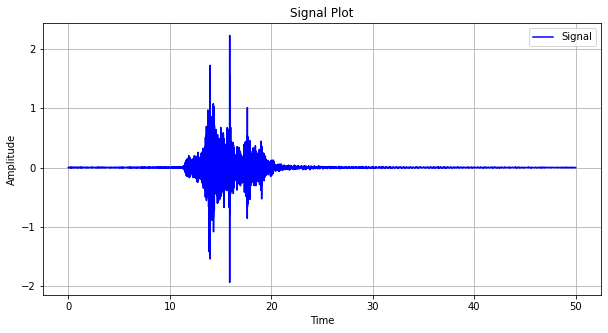

------------------------------



Signal length in seconds: 54.99273431823686 (s)


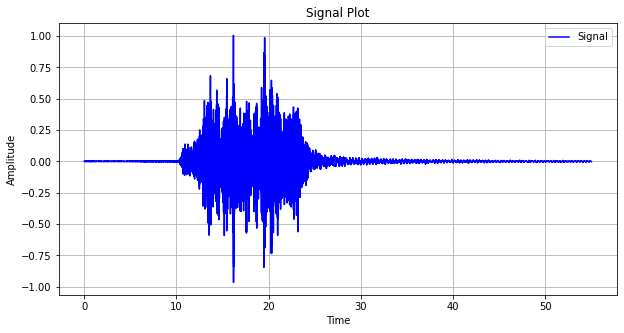

------------------------------



Signal length in seconds: 48.994914022765805 (s)


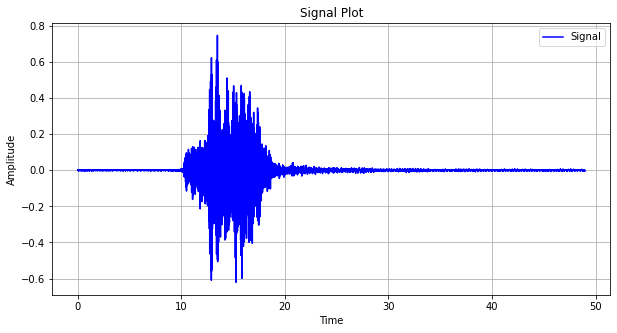

------------------------------



Signal length in seconds: 57.992249939452655 (s)


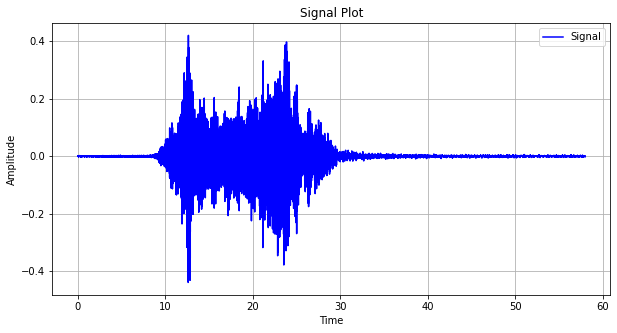

------------------------------



Signal length in seconds: 51.9944296439816 (s)


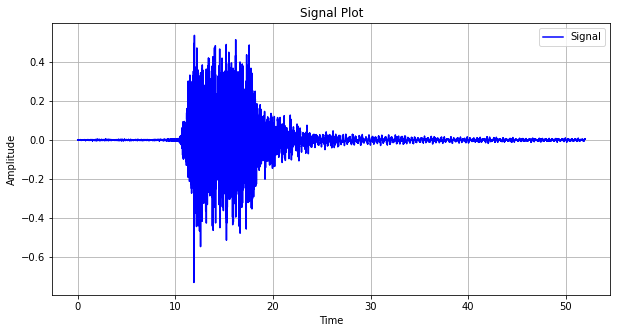

------------------------------



Signal length in seconds: 46.995640590942116 (s)


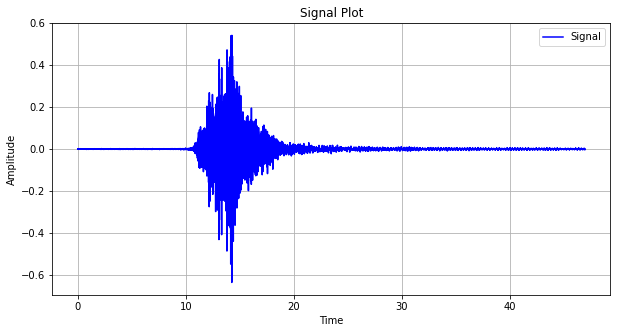

------------------------------



Signal length in seconds: 51.9944296439816 (s)


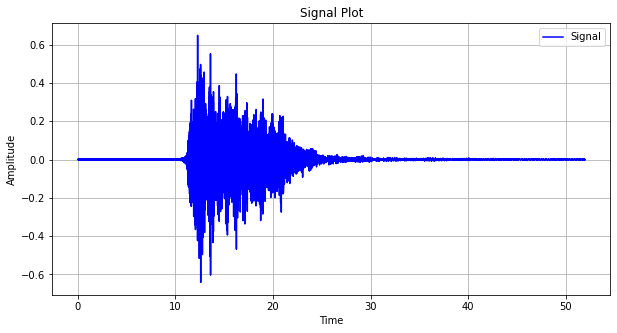

------------------------------



Signal length in seconds: 50.99418745458949 (s)


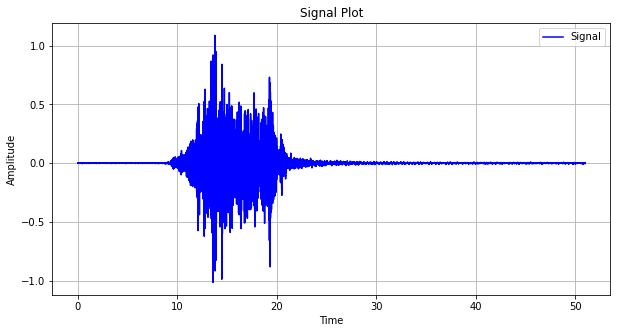

------------------------------



Signal length in seconds: 45.99660934851054 (s)


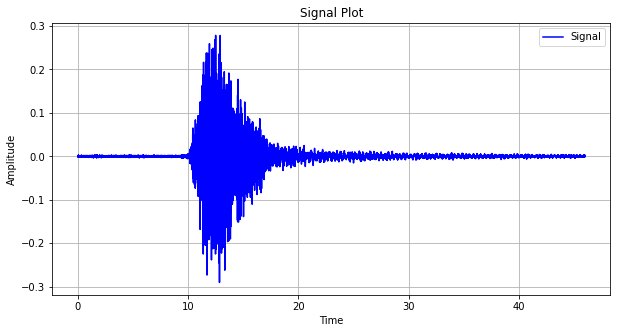

------------------------------



Signal length in seconds: 57.992249939452655 (s)


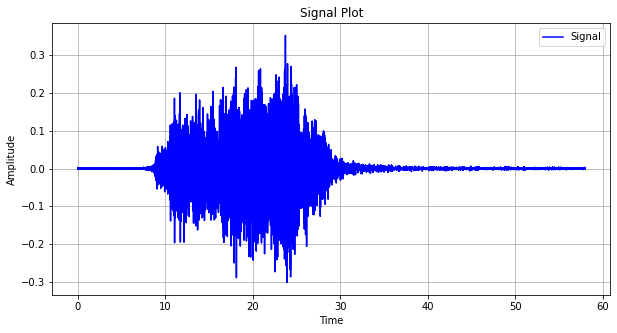

------------------------------



Signal length in seconds: 46.995640590942116 (s)


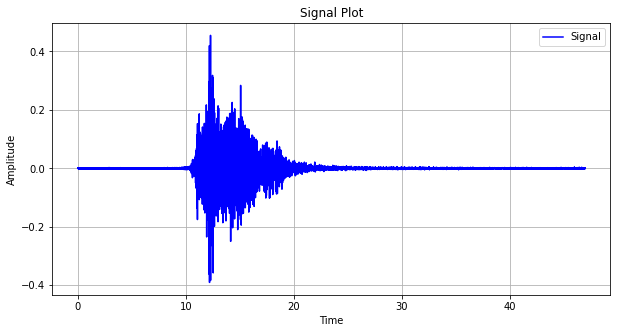

------------------------------



Signal length in seconds: 48.994914022765805 (s)


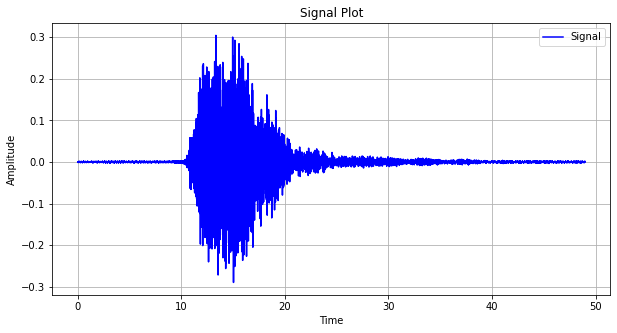

------------------------------



Signal length in seconds: 44.996367159118435 (s)


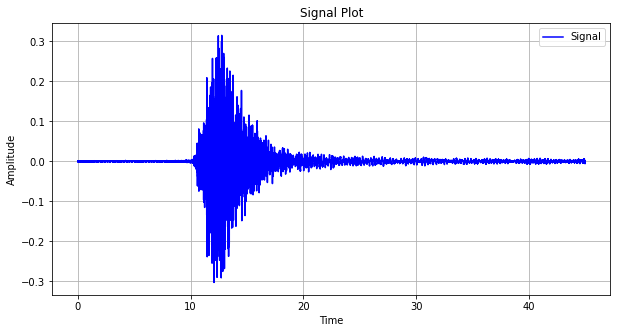

------------------------------



Signal length in seconds: 51.9944296439816 (s)


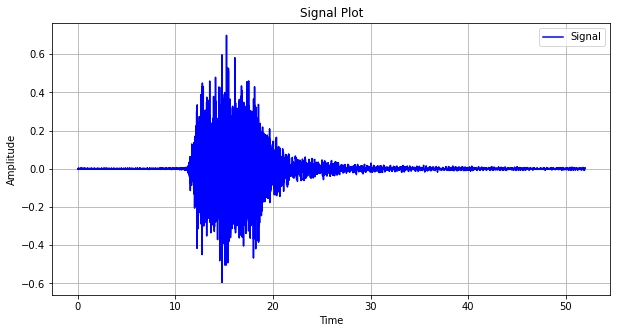

------------------------------



Signal length in seconds: 52.993460886413175 (s)


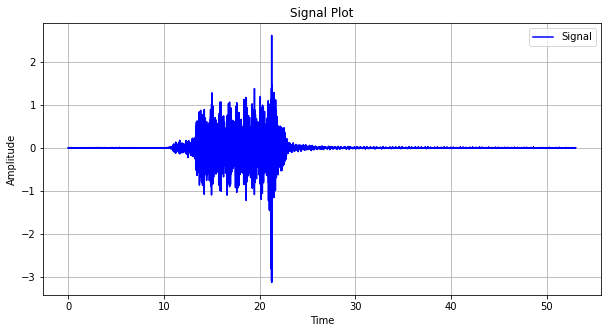

------------------------------



Signal length in seconds: 50.99418745458949 (s)


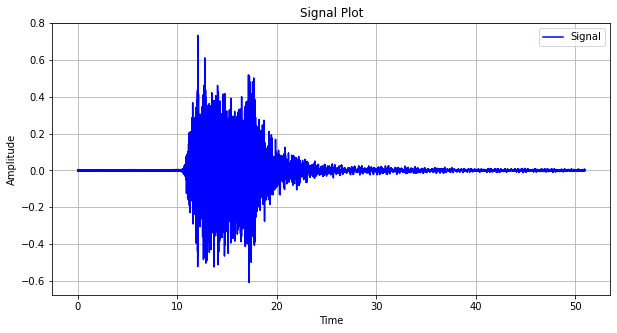

------------------------------



Signal length in seconds: 45.99660934851054 (s)


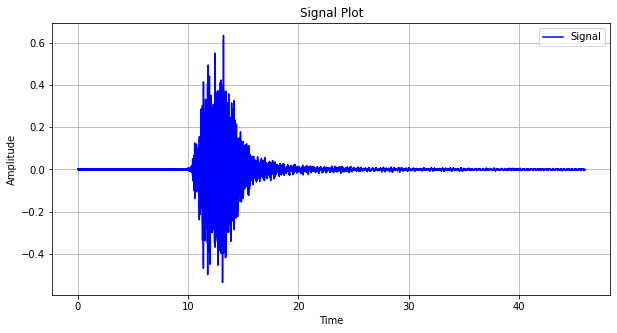

------------------------------



Signal length in seconds: 51.9944296439816 (s)


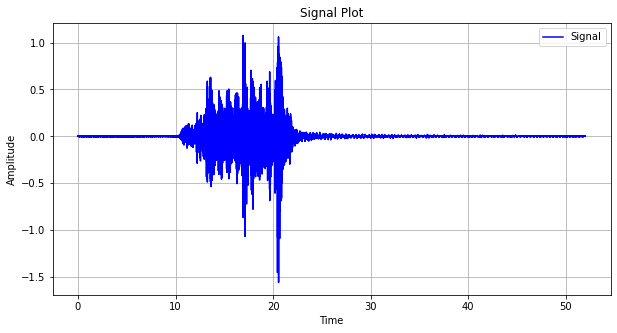

------------------------------



Signal length in seconds: 94.97820295471058 (s)


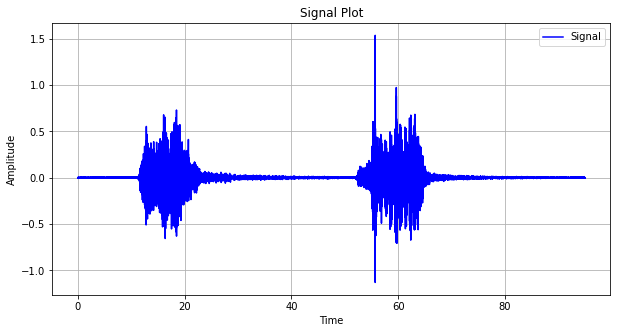

------------------------------



Signal length in seconds: 48.994914022765805 (s)


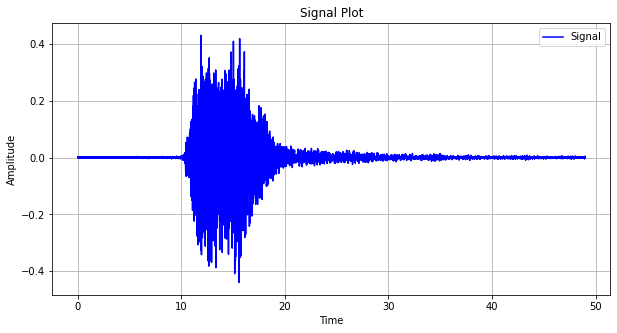

------------------------------



Signal length in seconds: 53.993703075805286 (s)


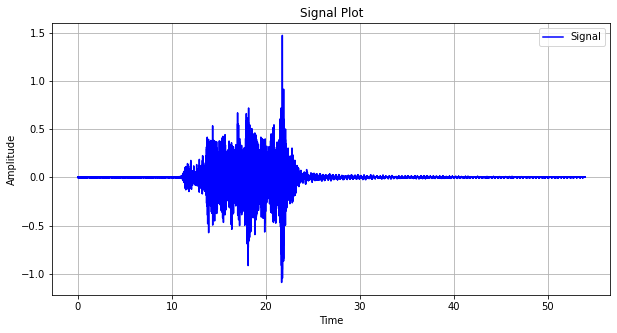

------------------------------



Signal length in seconds: 52.993460886413175 (s)


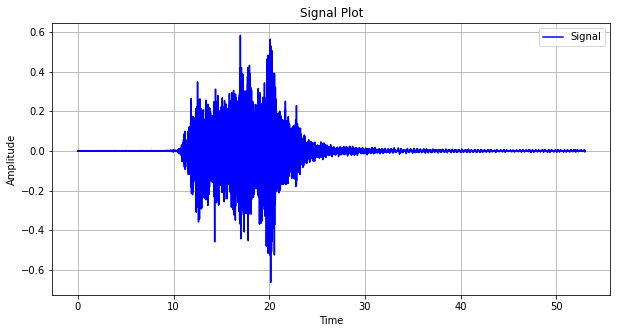

------------------------------



Signal length in seconds: 46.995640590942116 (s)


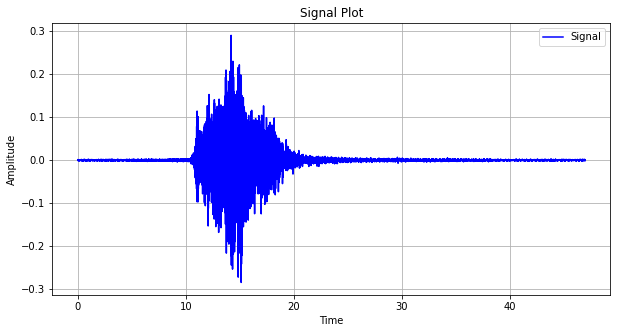

------------------------------



Signal length in seconds: 52.993460886413175 (s)


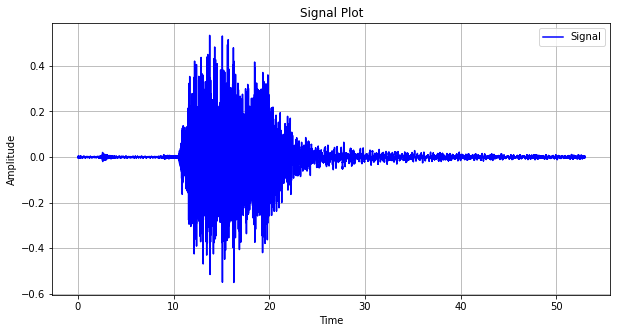

------------------------------



Signal length in seconds: 51.9944296439816 (s)


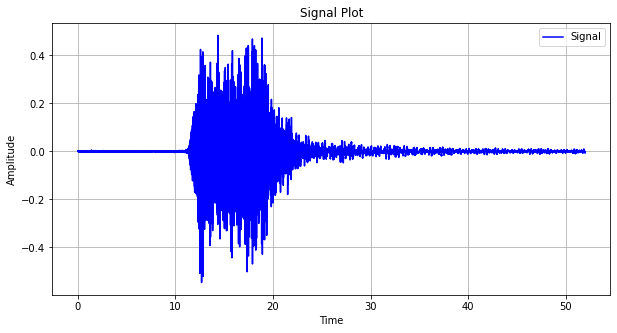

------------------------------



Signal length in seconds: 44.996367159118435 (s)


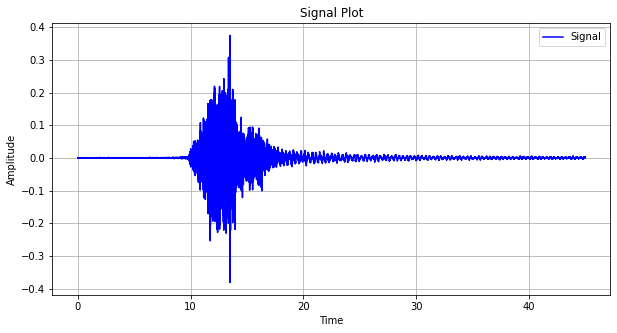

------------------------------



Signal length in seconds: 44.996367159118435 (s)


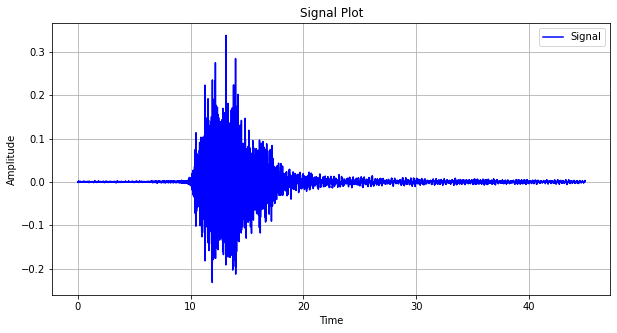

------------------------------



Signal length in seconds: 51.9944296439816 (s)


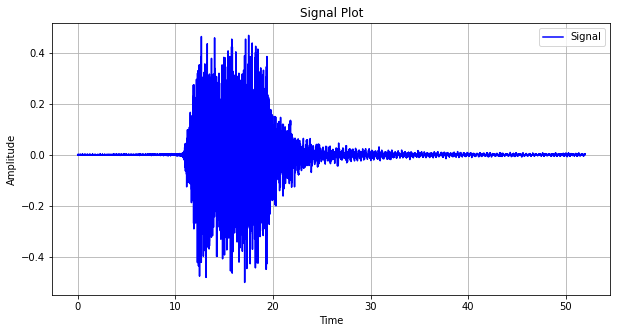

------------------------------



Signal length in seconds: 53.993703075805286 (s)


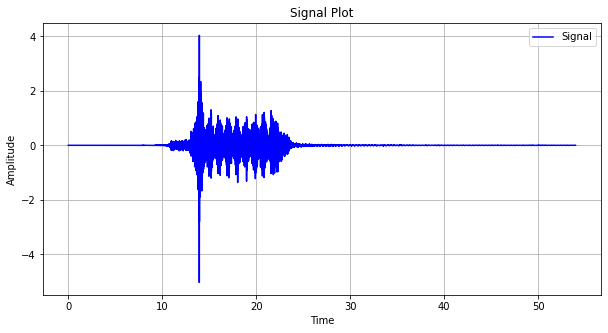

------------------------------



Signal length in seconds: 52.993460886413175 (s)


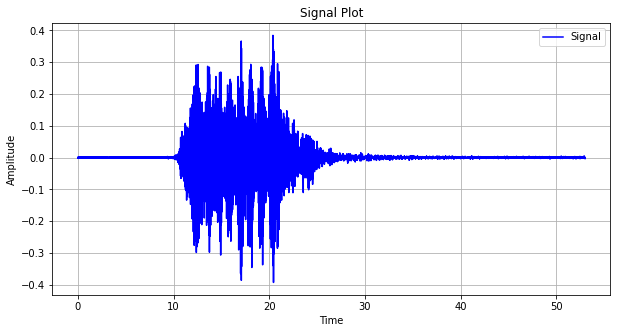

------------------------------



Signal length in seconds: 49.99515621215791 (s)


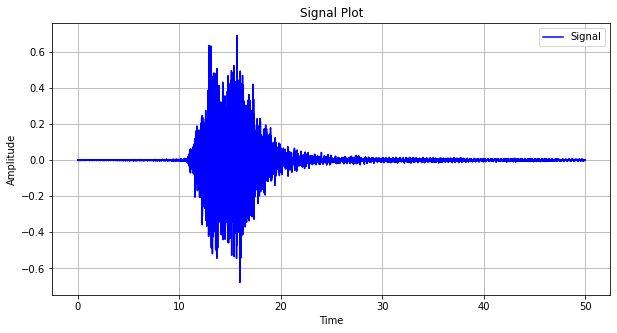

------------------------------



Signal length in seconds: 53.993703075805286 (s)


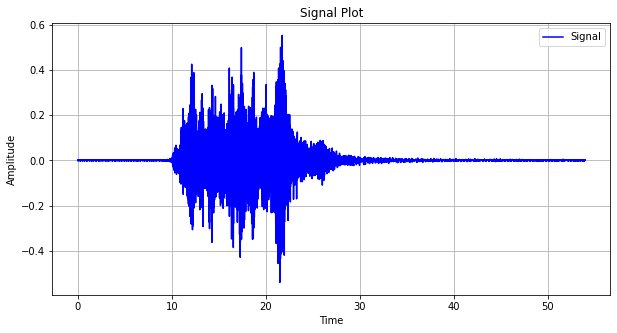

------------------------------



Signal length in seconds: 52.993460886413175 (s)


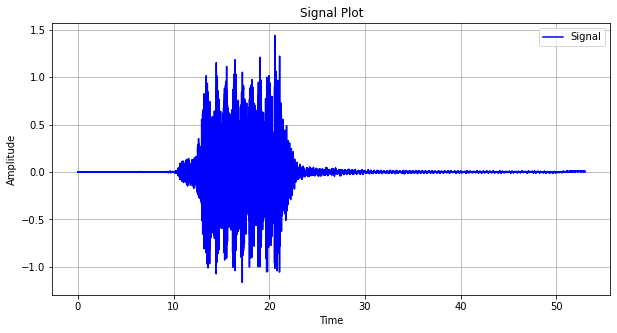

------------------------------



Signal length in seconds: 52.993460886413175 (s)


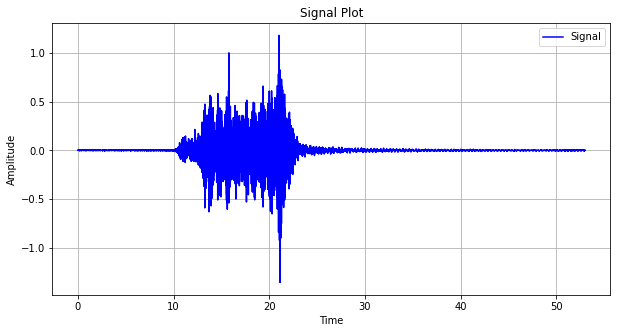

------------------------------



Signal length in seconds: 52.993460886413175 (s)


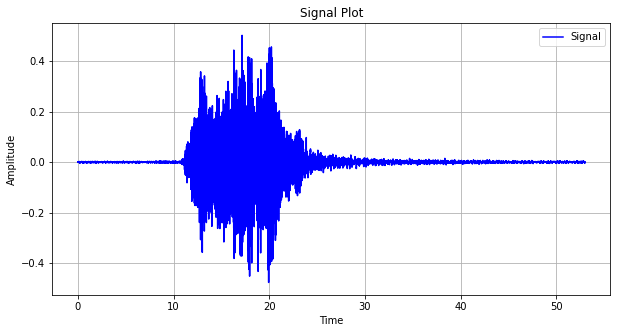

------------------------------



Signal length in seconds: 83.98280455316058 (s)


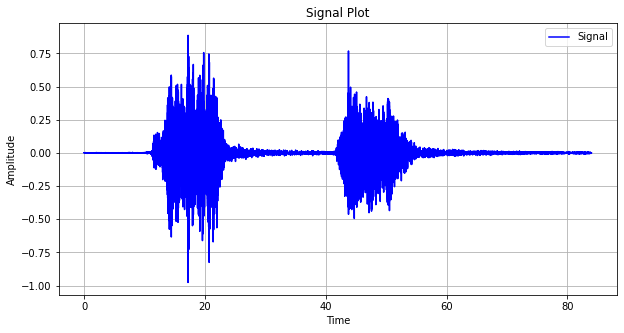

------------------------------



Signal length in seconds: 44.996367159118435 (s)


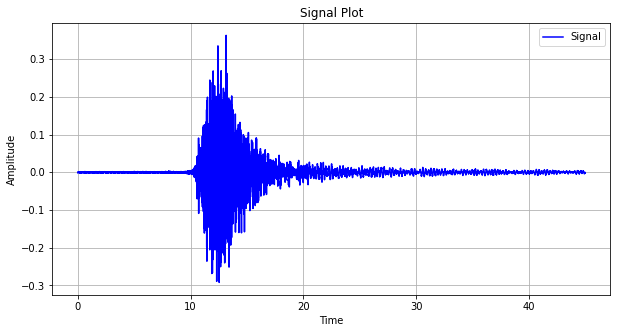

------------------------------



Signal length in seconds: 52.993460886413175 (s)


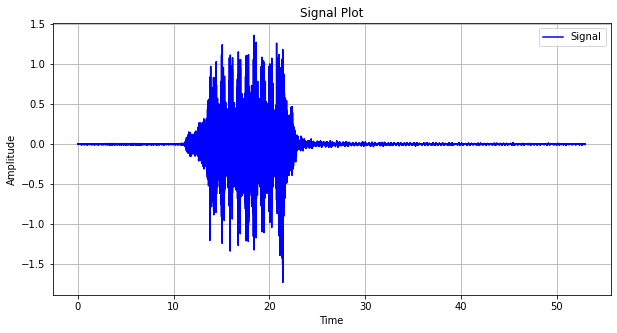

------------------------------



Signal length in seconds: 45.99660934851054 (s)


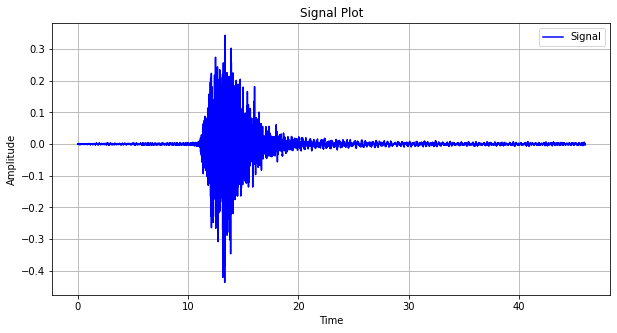

------------------------------



Signal length in seconds: 59.991523371276344 (s)


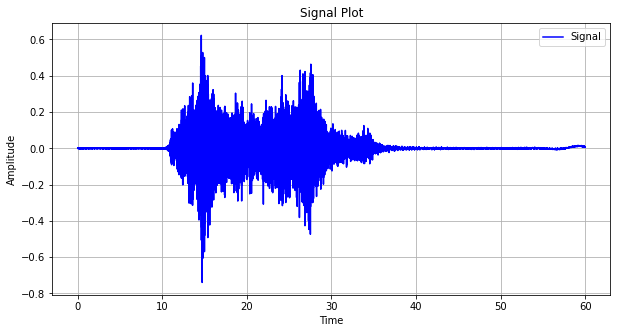

------------------------------



Signal length in seconds: 51.9944296439816 (s)


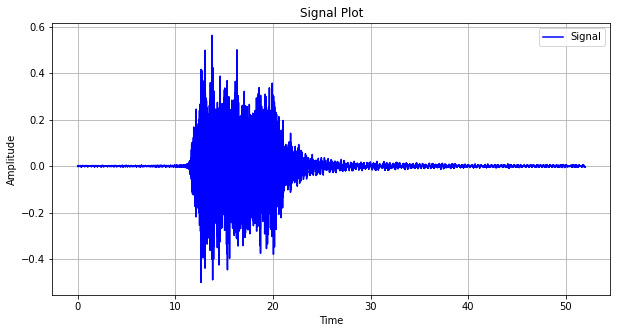

------------------------------



Signal length in seconds: 44.996367159118435 (s)


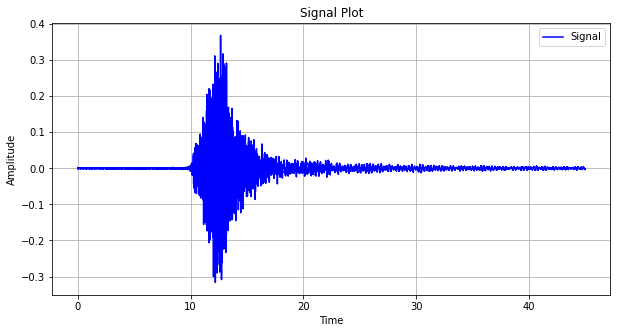

------------------------------



Signal length in seconds: 47.99588278033423 (s)


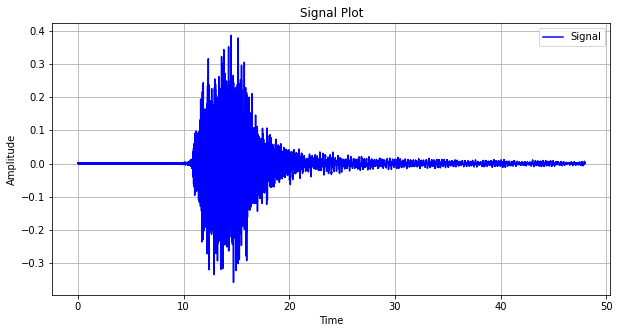

------------------------------



Signal length in seconds: 53.993703075805286 (s)


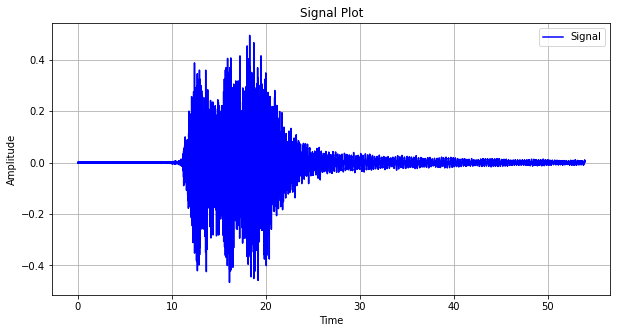

------------------------------



Signal length in seconds: 47.99588278033423 (s)


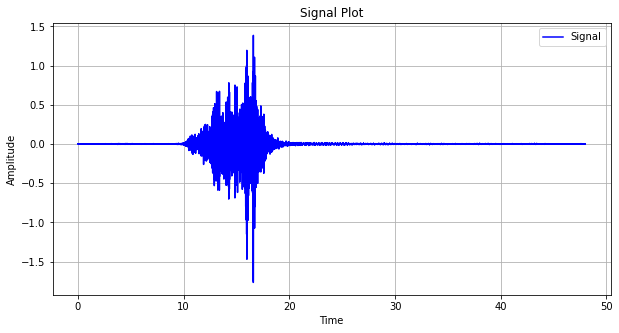

------------------------------



Signal length in seconds: 54.99273431823686 (s)


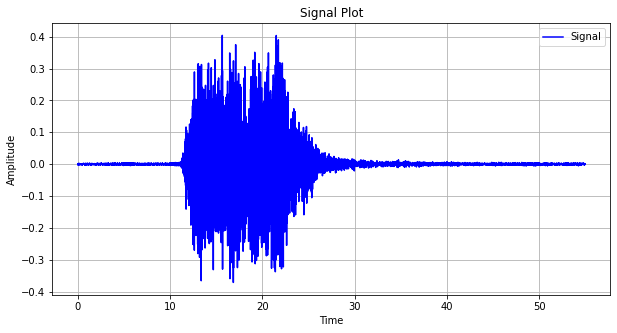

------------------------------



Signal length in seconds: 52.993460886413175 (s)


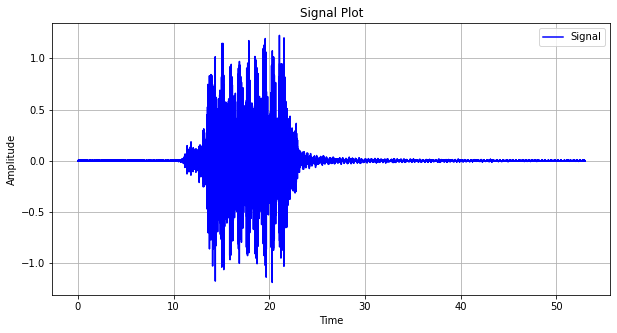

------------------------------



Signal length in seconds: 46.995640590942116 (s)


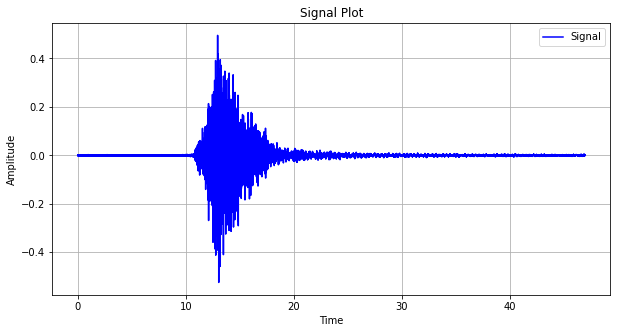

------------------------------



Signal length in seconds: 52.993460886413175 (s)


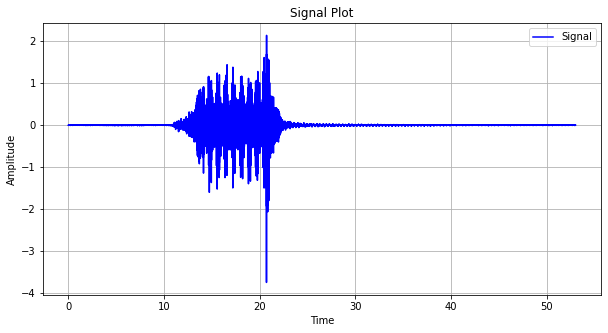

------------------------------



Signal length in seconds: 54.99273431823686 (s)


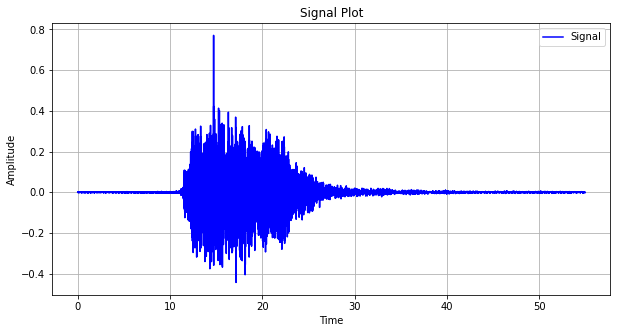

------------------------------



Signal length in seconds: 45.99660934851054 (s)


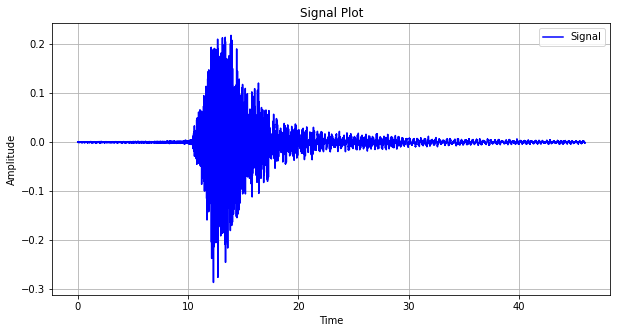

------------------------------



Signal length in seconds: 51.9944296439816 (s)


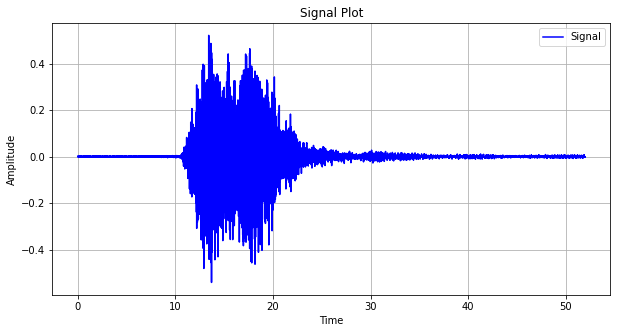

------------------------------



Signal length in seconds: 52.993460886413175 (s)


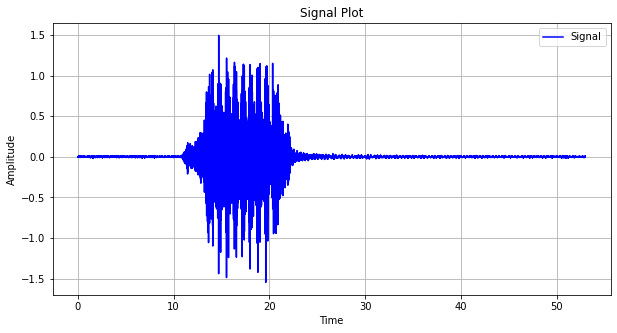

------------------------------



Signal length in seconds: 49.99515621215791 (s)


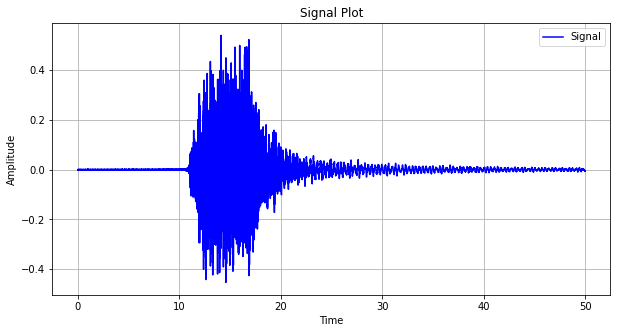

------------------------------



Signal length in seconds: 49.99515621215791 (s)


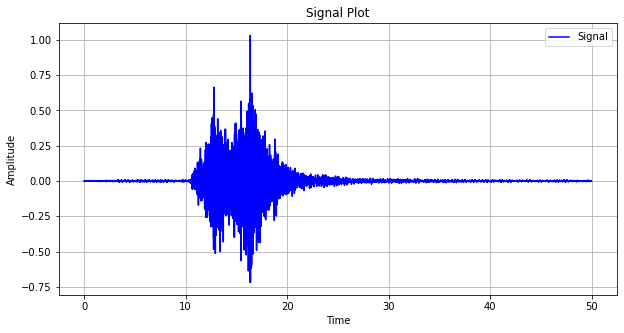

------------------------------



Signal length in seconds: 52.993460886413175 (s)


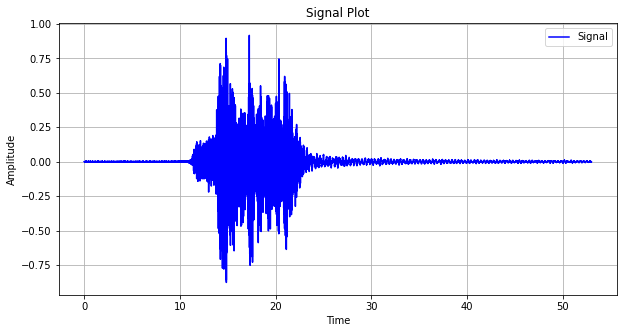

------------------------------



Signal length in seconds: 52.993460886413175 (s)


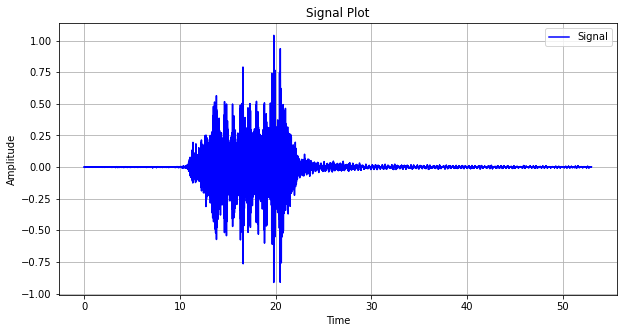

------------------------------



Signal length in seconds: 50.99418745458949 (s)


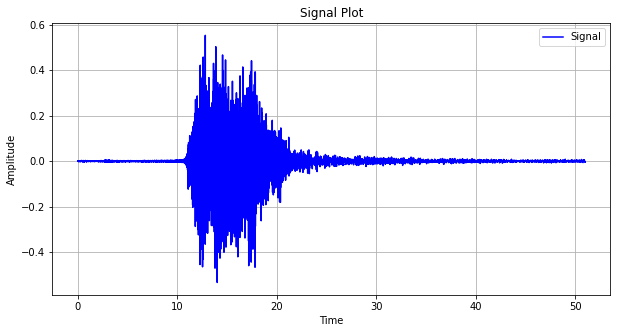

------------------------------



Signal length in seconds: 45.99660934851054 (s)


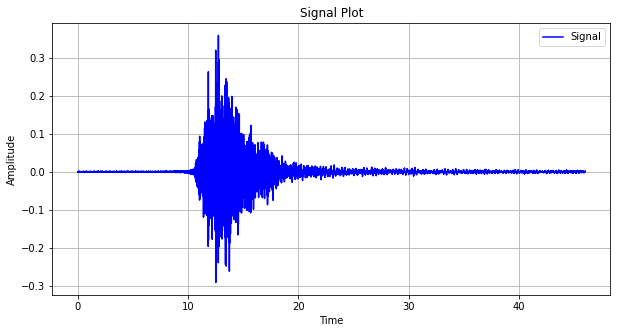

------------------------------



Signal length in seconds: 52.993460886413175 (s)


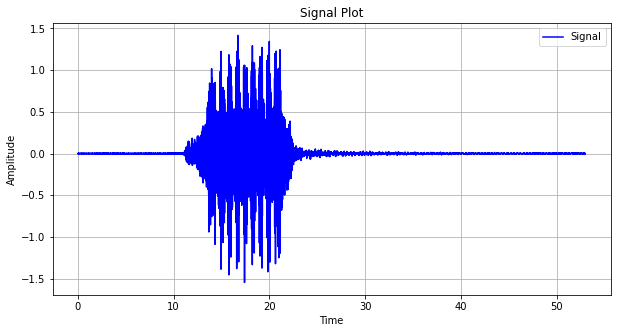

------------------------------



Signal length in seconds: 79.9842576895132 (s)


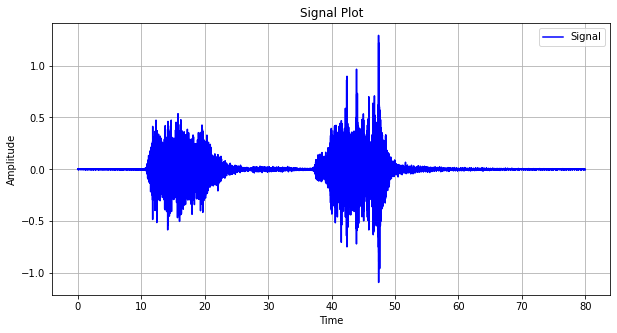

------------------------------



Signal length in seconds: 50.99418745458949 (s)


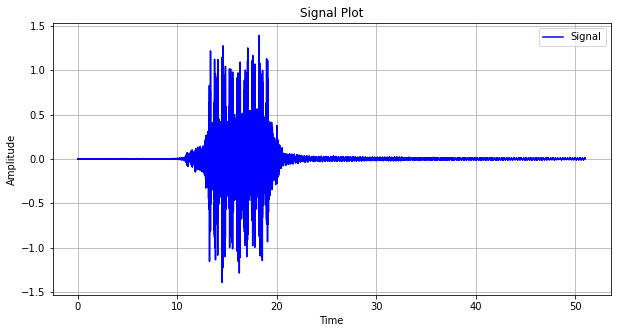

------------------------------



Signal length in seconds: 45.99660934851054 (s)


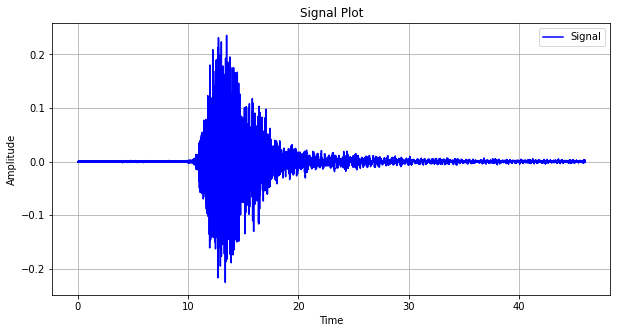

------------------------------



Signal length in seconds: 51.9944296439816 (s)


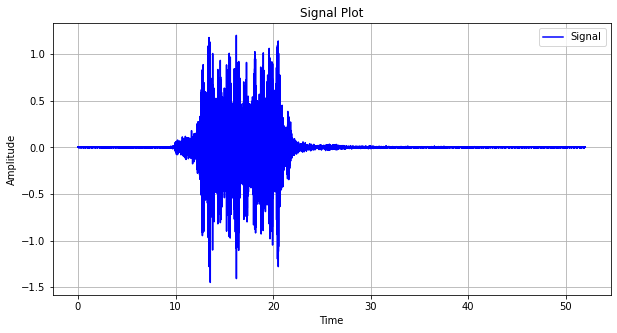

------------------------------



Signal length in seconds: 52.993460886413175 (s)


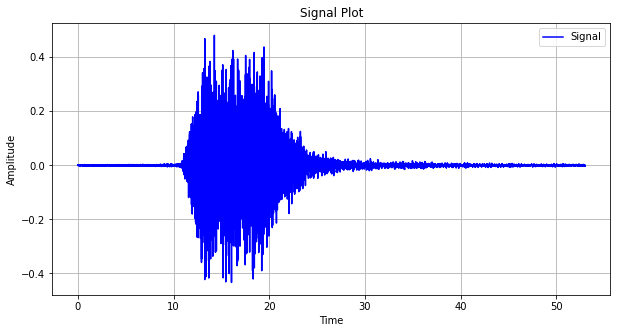

------------------------------



Signal length in seconds: 49.99515621215791 (s)


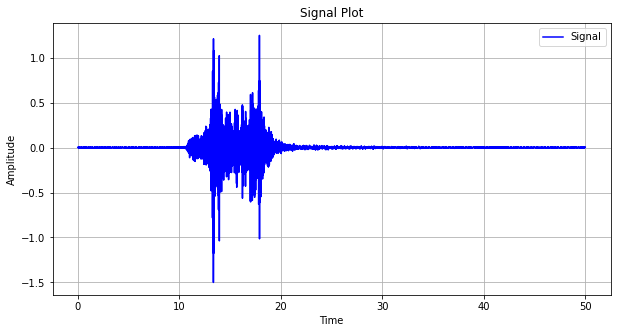

------------------------------



Signal length in seconds: 53.993703075805286 (s)


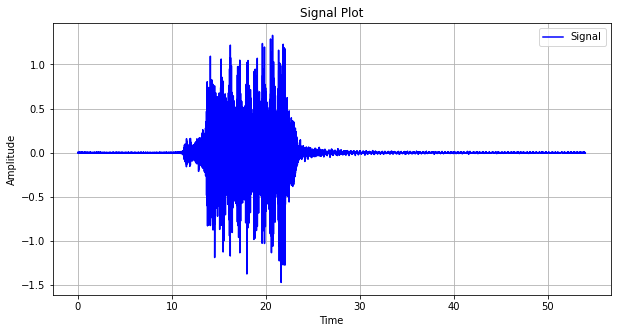

------------------------------



Signal length in seconds: 51.9944296439816 (s)


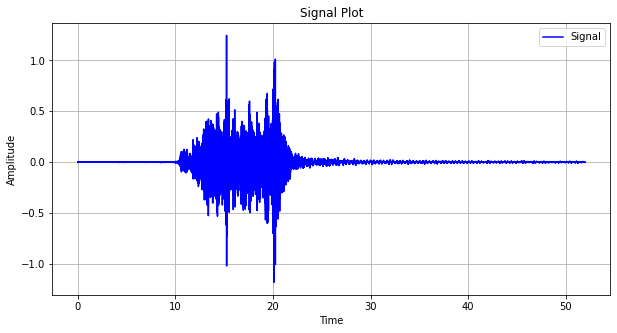

------------------------------



Signal length in seconds: 51.9944296439816 (s)


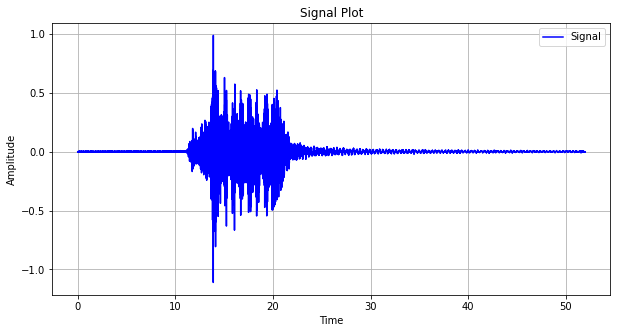

------------------------------



Signal length in seconds: 51.9944296439816 (s)


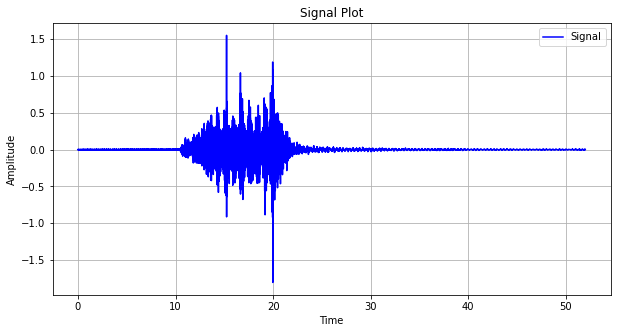

------------------------------



Signal length in seconds: 52.993460886413175 (s)


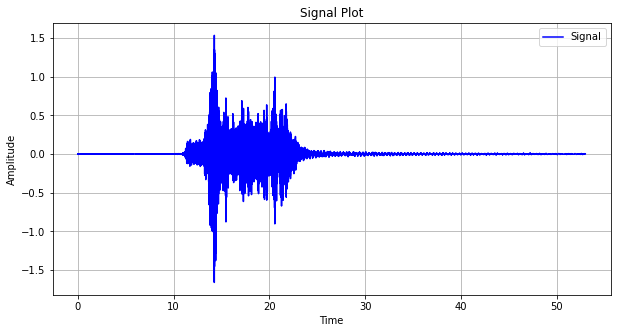

------------------------------



Signal length in seconds: 44.996367159118435 (s)


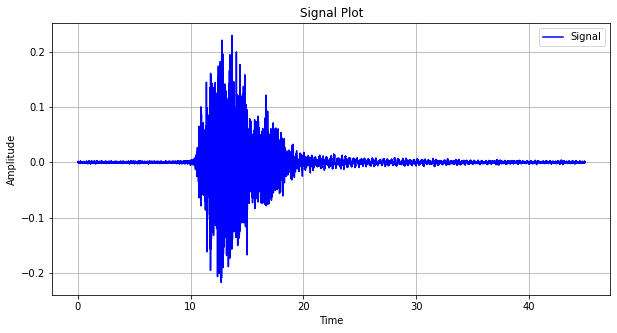

------------------------------



Signal length in seconds: 78.9840155001211 (s)


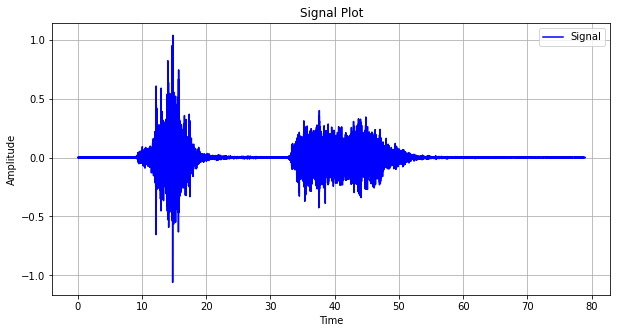

------------------------------



Signal length in seconds: 52.993460886413175 (s)


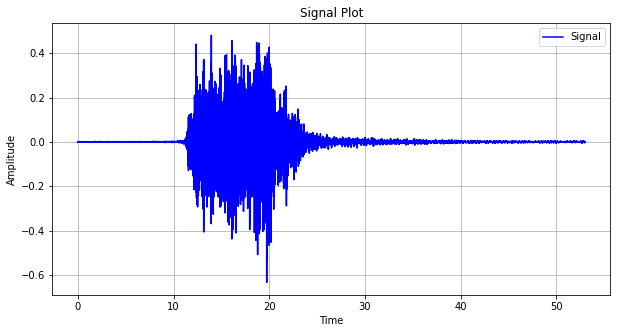

------------------------------



Signal length in seconds: 87.98135141680795 (s)


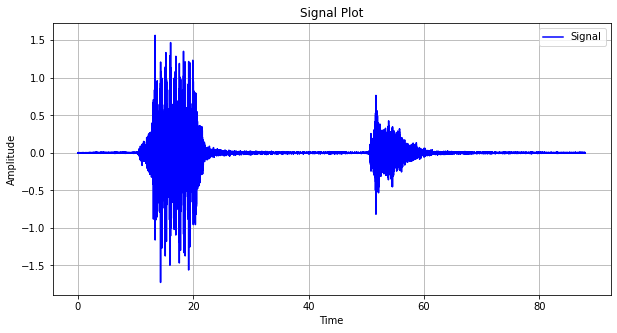

------------------------------



Signal length in seconds: 50.99418745458949 (s)


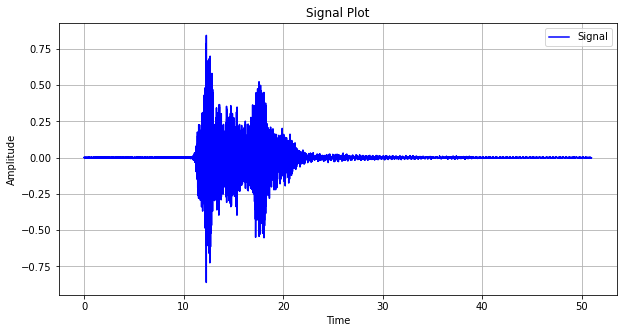

------------------------------



Signal length in seconds: 53.993703075805286 (s)


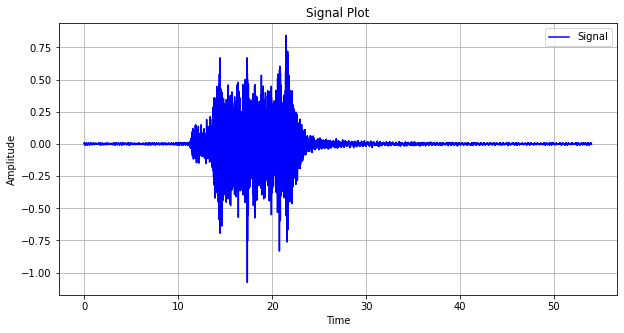

------------------------------



Signal length in seconds: 44.996367159118435 (s)


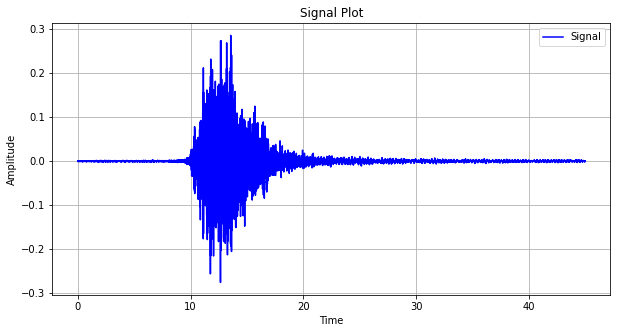

------------------------------



Signal length in seconds: 52.993460886413175 (s)


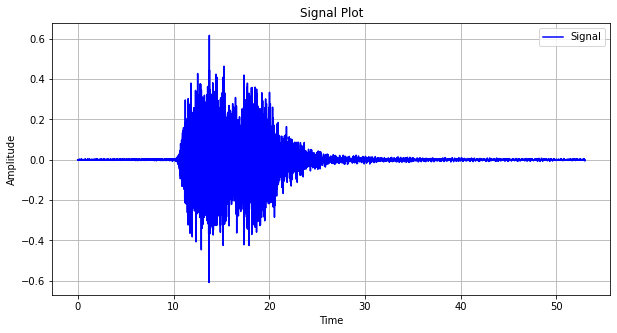

------------------------------



Signal length in seconds: 50.99418745458949 (s)


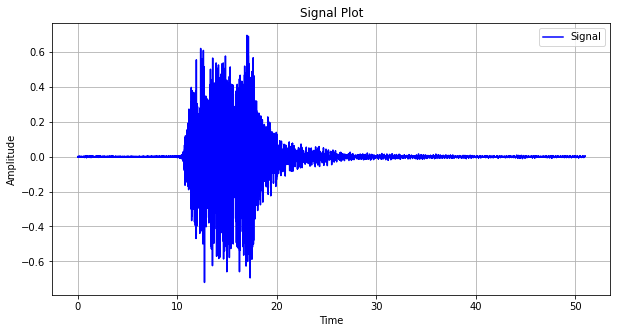

------------------------------



Signal length in seconds: 65.9893436667474 (s)


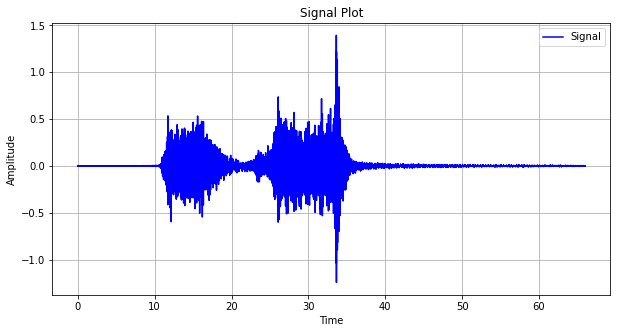

------------------------------



Signal length in seconds: 45.99660934851054 (s)


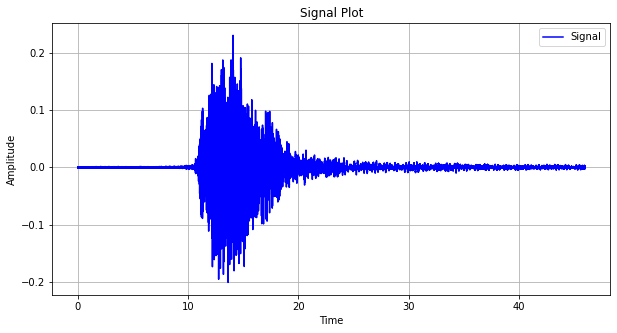

------------------------------



Signal length in seconds: 47.99588278033423 (s)


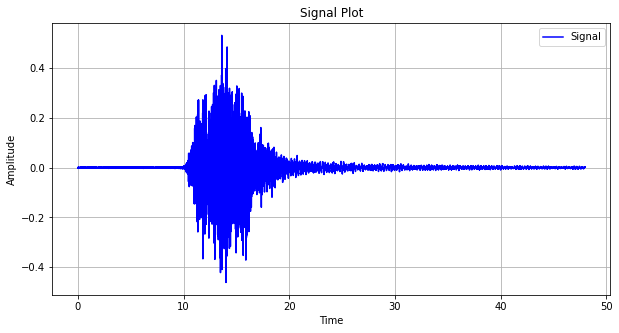

------------------------------



Signal length in seconds: 50.99418745458949 (s)


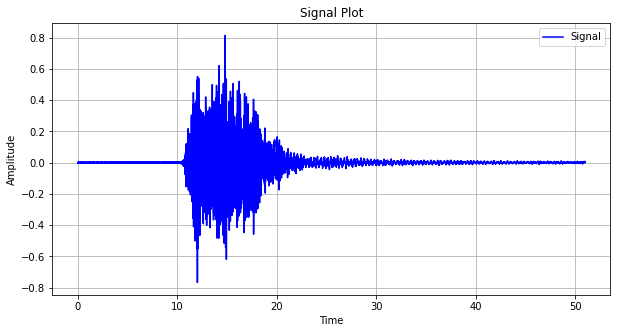

------------------------------



Signal length in seconds: 50.99418745458949 (s)


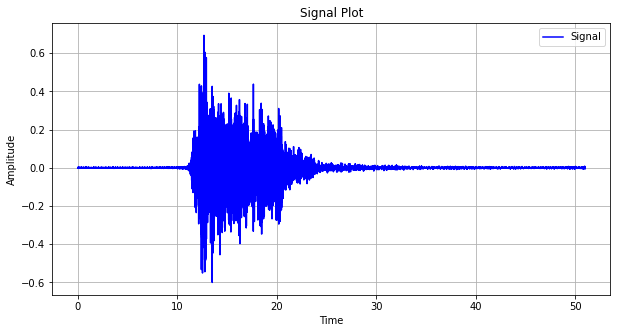

------------------------------



Signal length in seconds: 68.98764834100267 (s)


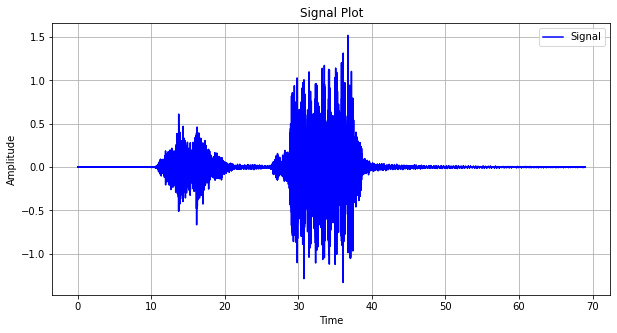

------------------------------



Signal length in seconds: 50.99418745458949 (s)


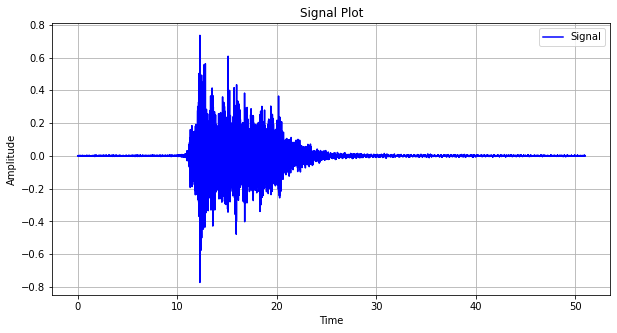

------------------------------



Signal length in seconds: 48.994914022765805 (s)


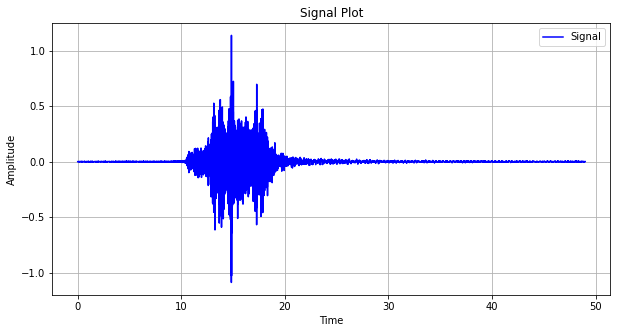

------------------------------



Signal length in seconds: 46.995640590942116 (s)


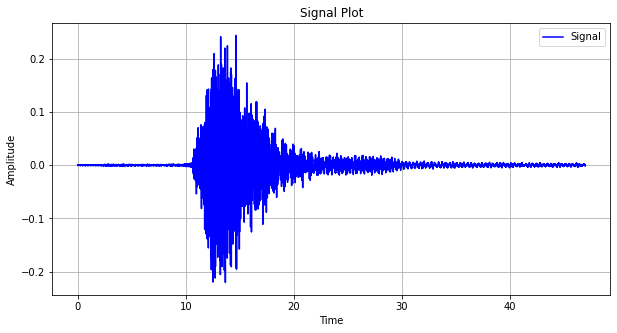

------------------------------



Signal length in seconds: 51.9944296439816 (s)


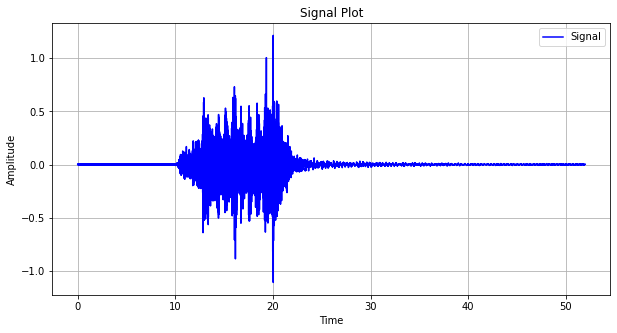

------------------------------



Signal length in seconds: 47.99588278033423 (s)


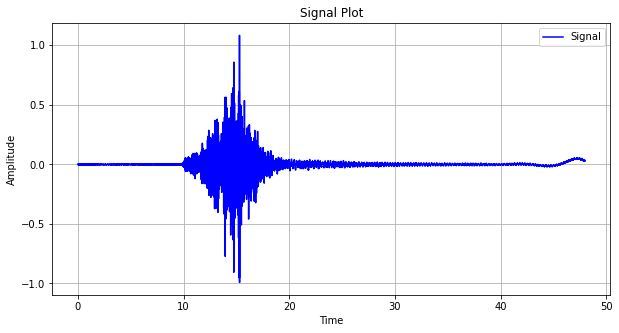

------------------------------



Signal length in seconds: 45.99660934851054 (s)


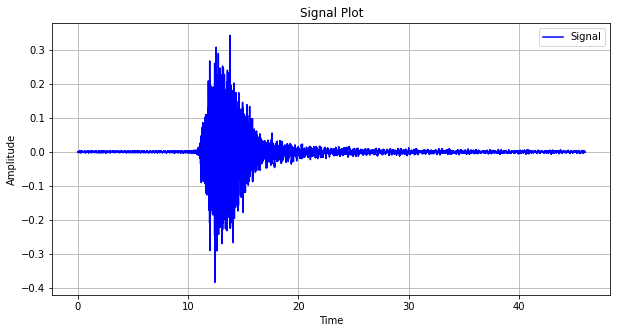

------------------------------



Signal length in seconds: 52.993460886413175 (s)


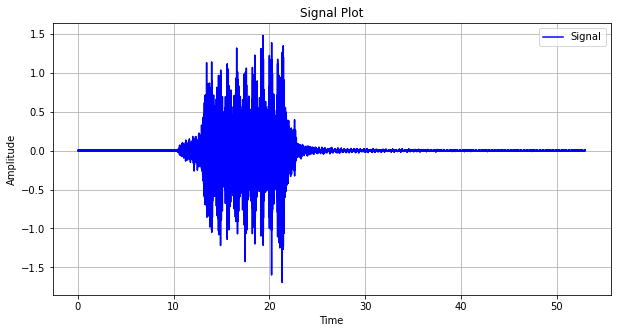

------------------------------



Signal length in seconds: 53.993703075805286 (s)


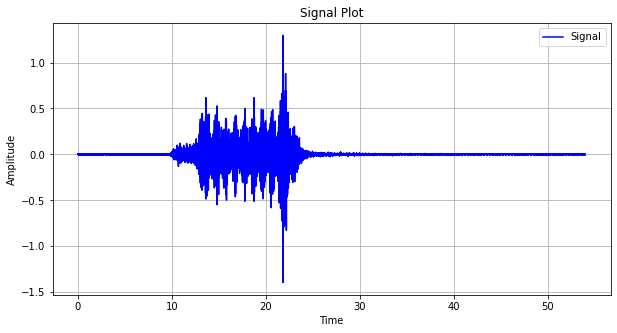

------------------------------



Signal length in seconds: 61.990796803100025 (s)


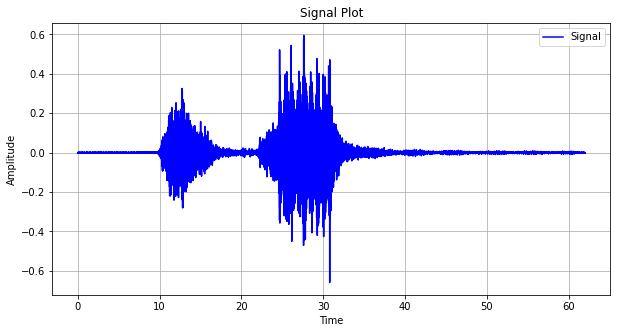

------------------------------



Signal length in seconds: 50.99418745458949 (s)


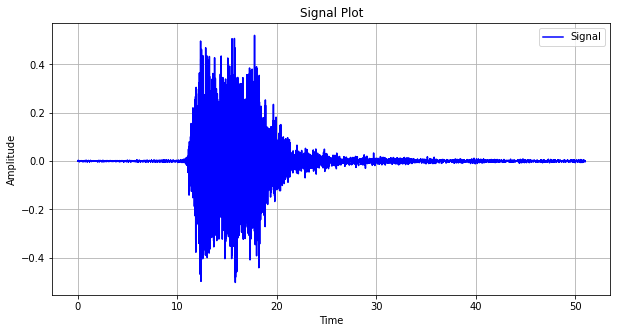

------------------------------



Signal length in seconds: 52.993460886413175 (s)


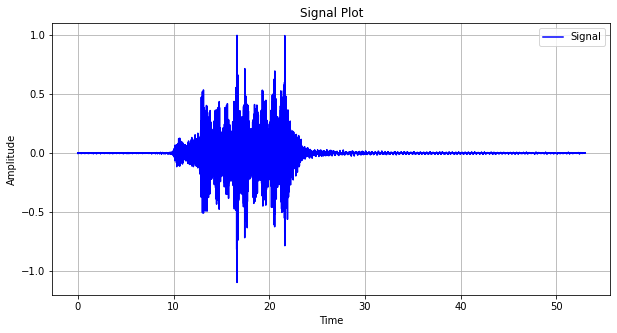

------------------------------



Signal length in seconds: 51.9944296439816 (s)


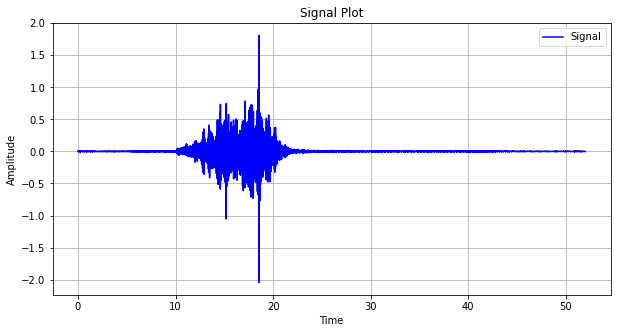

------------------------------



Signal length in seconds: 52.993460886413175 (s)


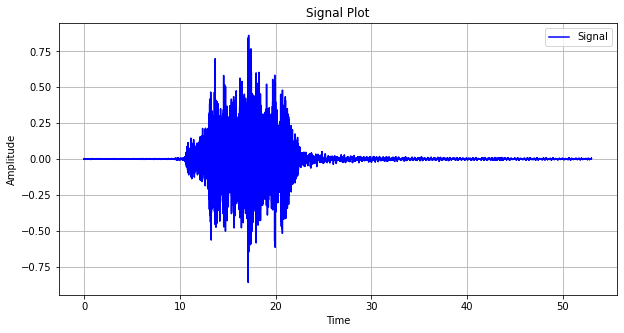

------------------------------



Signal length in seconds: 53.993703075805286 (s)


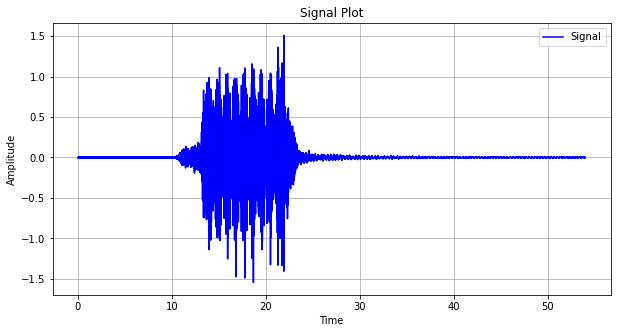

------------------------------



Signal length in seconds: 82.98256236376847 (s)


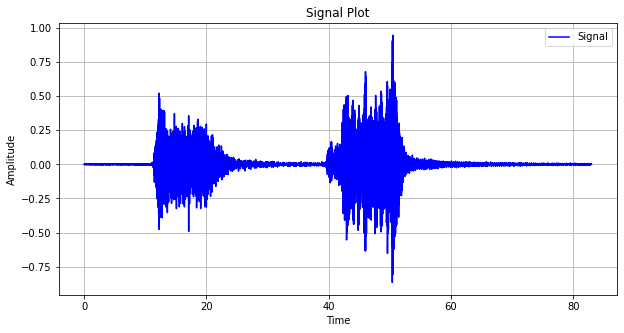

------------------------------



Signal length in seconds: 53.993703075805286 (s)


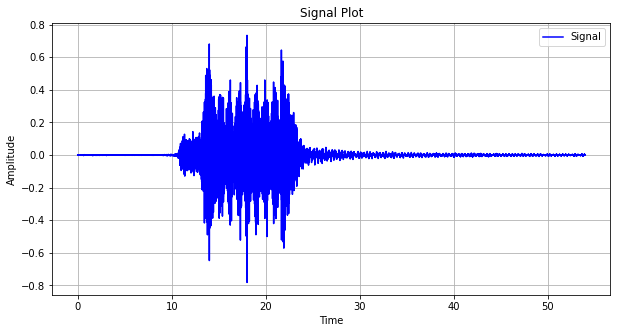

------------------------------



Signal length in seconds: 44.996367159118435 (s)


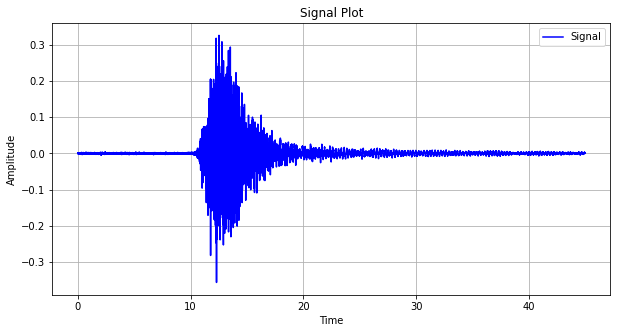

------------------------------



Signal length in seconds: 53.993703075805286 (s)


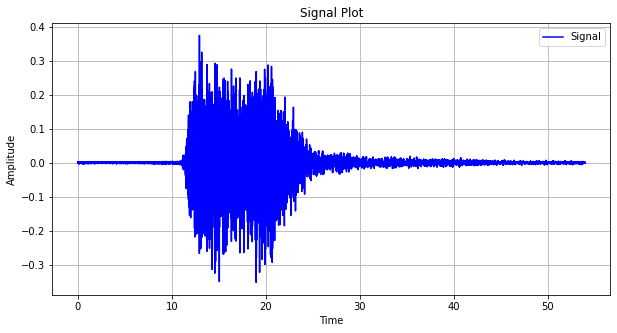

------------------------------



Signal length in seconds: 51.9944296439816 (s)


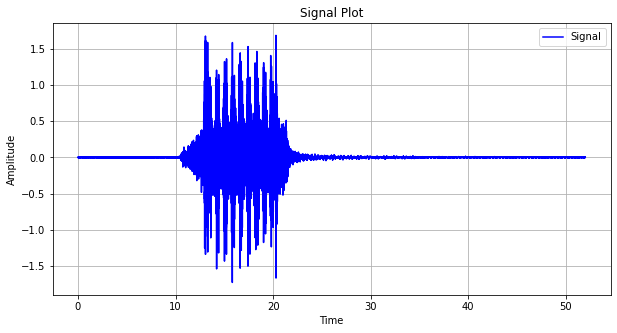

------------------------------



Signal length in seconds: 52.993460886413175 (s)


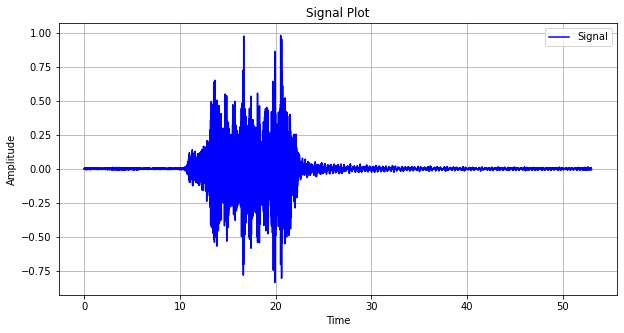

------------------------------



Signal length in seconds: 55.99297650762897 (s)


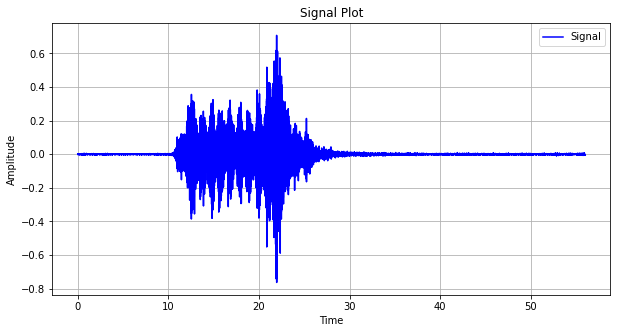

------------------------------



Signal length in seconds: 56.99200775006055 (s)


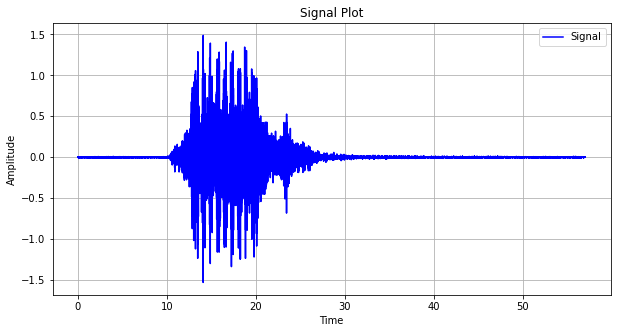

------------------------------



Signal length in seconds: 45.99660934851054 (s)


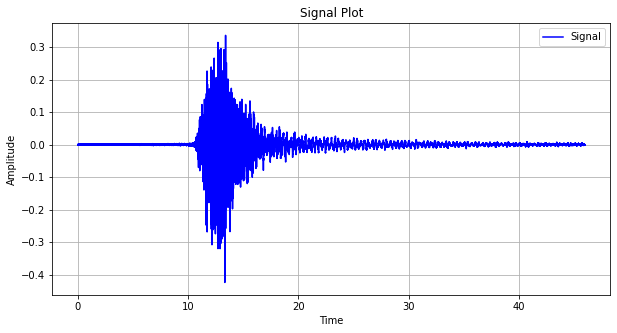

------------------------------



Signal length in seconds: 53.993703075805286 (s)


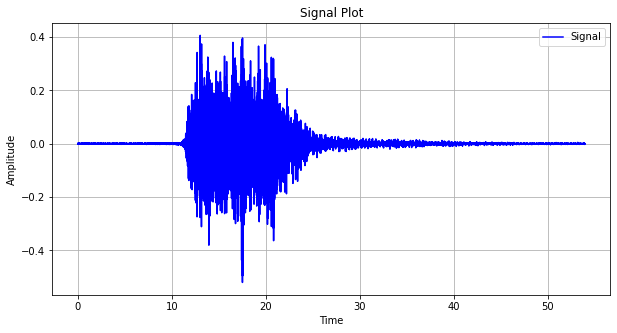

------------------------------



Signal length in seconds: 46.995640590942116 (s)


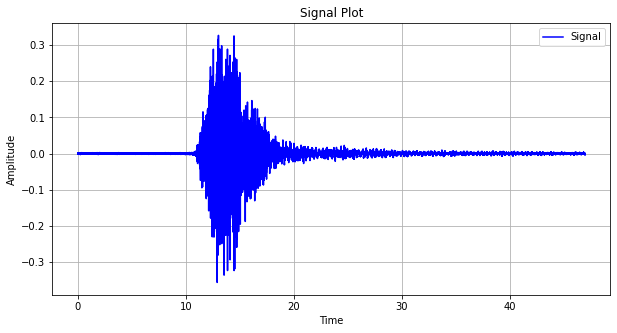

------------------------------



Signal length in seconds: 52.993460886413175 (s)


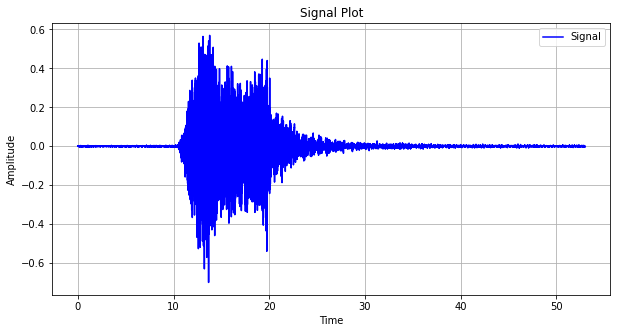

------------------------------



Signal length in seconds: 52.993460886413175 (s)


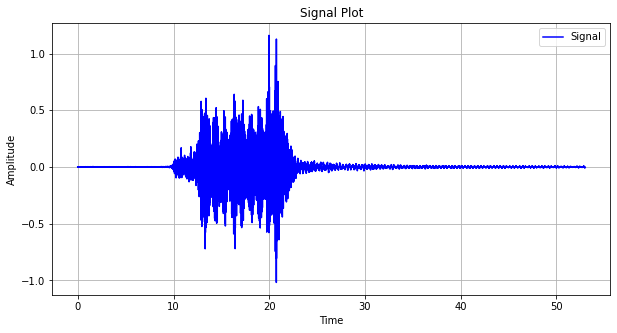

------------------------------



Signal length in seconds: 53.993703075805286 (s)


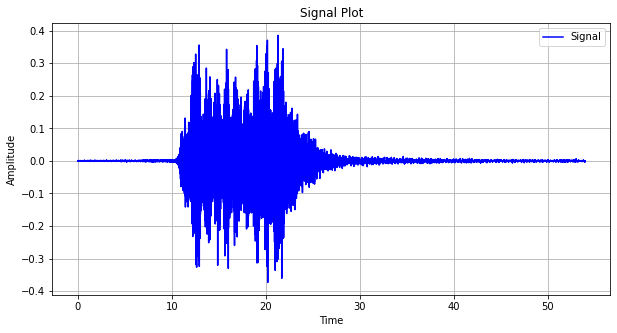

------------------------------



Signal length in seconds: 51.9944296439816 (s)


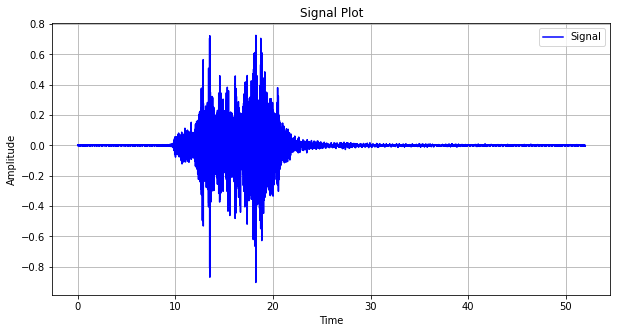

------------------------------



Signal length in seconds: 52.993460886413175 (s)


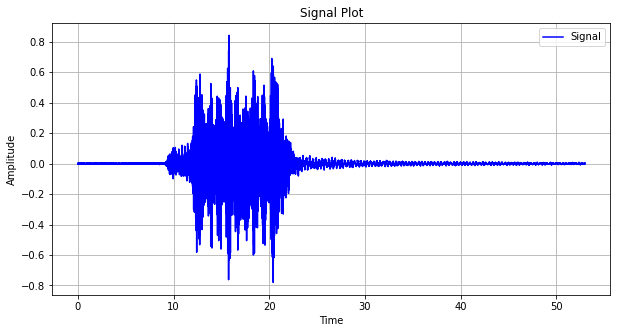

------------------------------



Signal length in seconds: 44.996367159118435 (s)


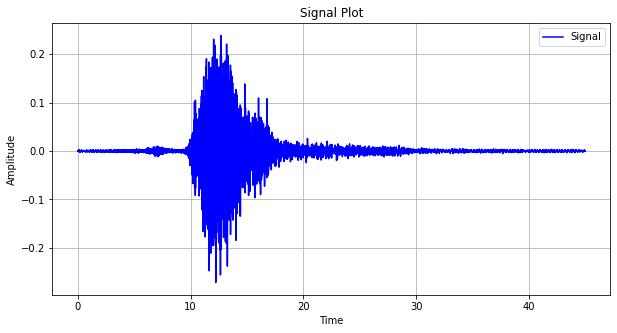

------------------------------



Signal length in seconds: 46.995640590942116 (s)


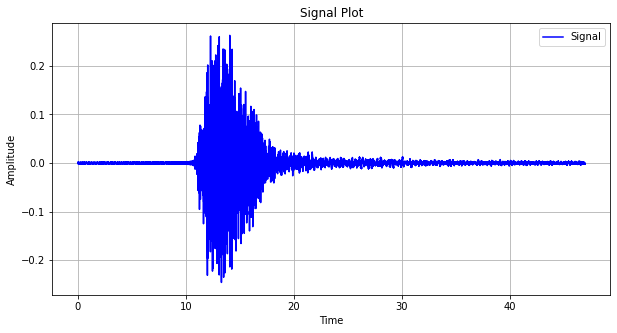

------------------------------



Signal length in seconds: 45.99660934851054 (s)


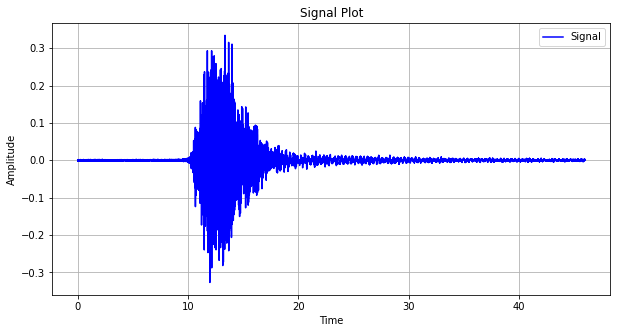

------------------------------



Signal length in seconds: 45.99660934851054 (s)


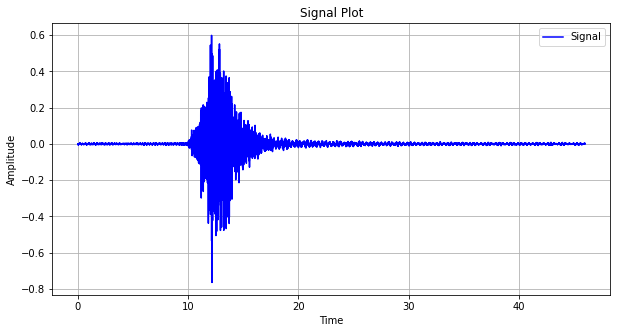

------------------------------



Signal length in seconds: 51.9944296439816 (s)


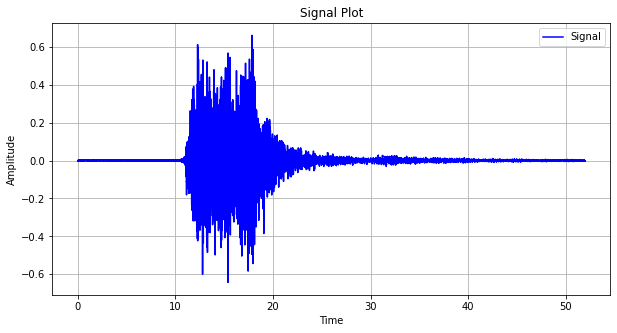

------------------------------



Signal length in seconds: 49.99515621215791 (s)


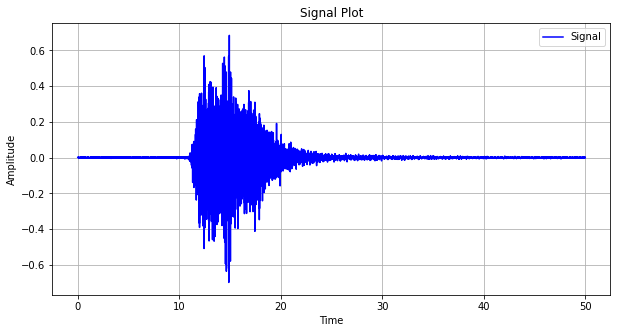

------------------------------



Signal length in seconds: 54.99273431823686 (s)


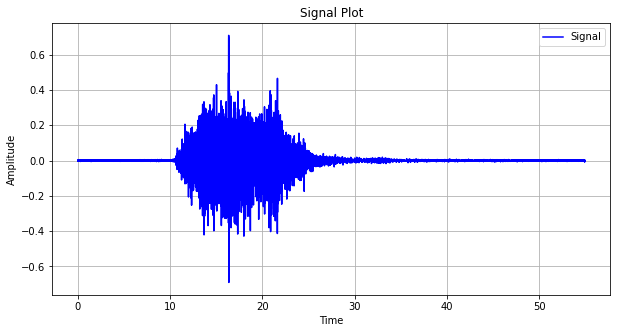

------------------------------



Signal length in seconds: 47.99588278033423 (s)


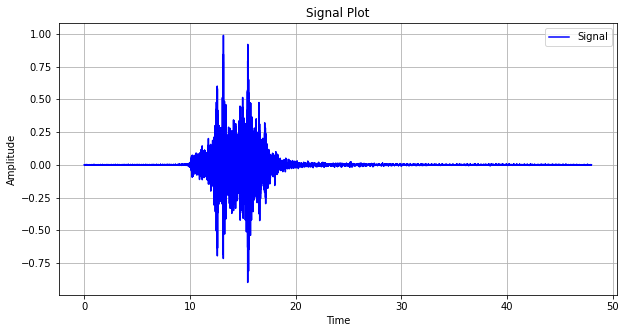

------------------------------



Signal length in seconds: 52.993460886413175 (s)


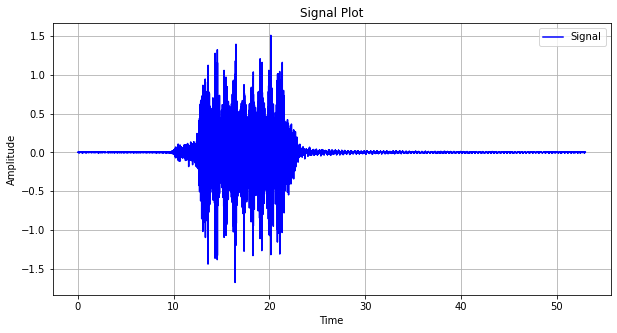

------------------------------



Signal length in seconds: 48.994914022765805 (s)


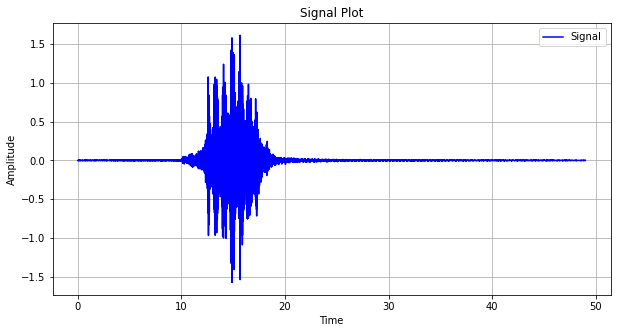

------------------------------



Signal length in seconds: 53.993703075805286 (s)


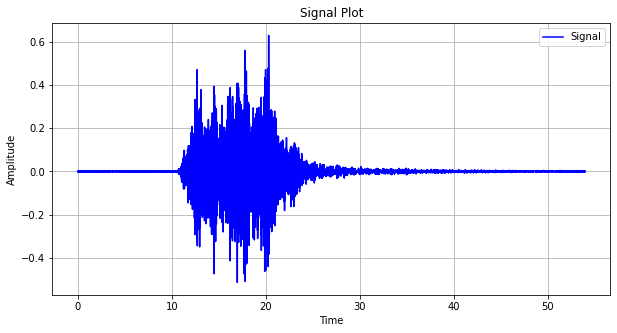

------------------------------



Signal length in seconds: 51.9944296439816 (s)


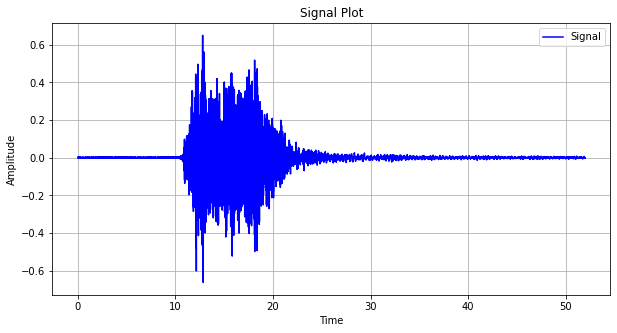

------------------------------



Signal length in seconds: 45.99660934851054 (s)


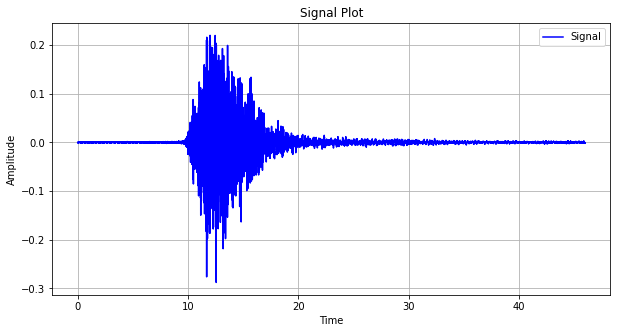

------------------------------



Signal length in seconds: 53.993703075805286 (s)


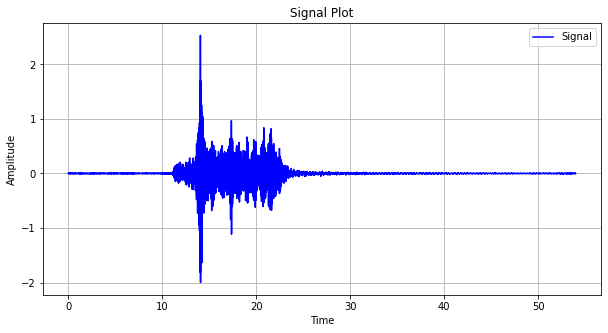

------------------------------



Signal length in seconds: 52.949866795834346 (s)


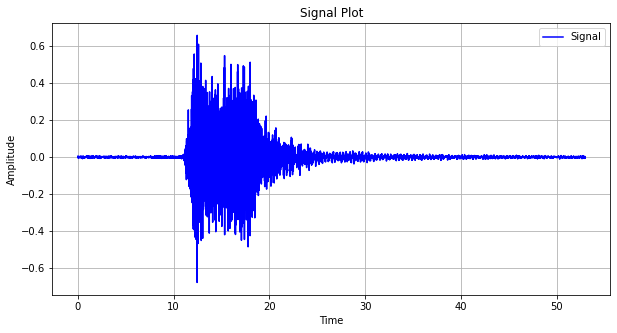

------------------------------



Signal length in seconds: 53.993703075805286 (s)


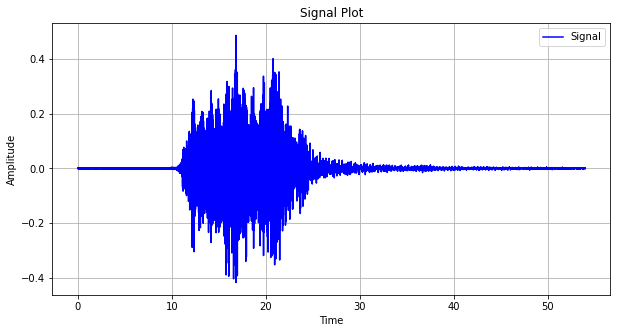

------------------------------



Signal length in seconds: 52.993460886413175 (s)


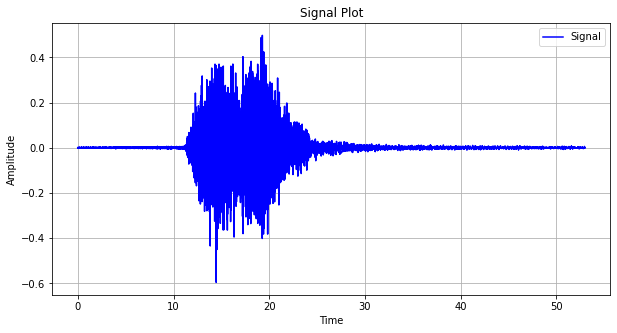

------------------------------



Signal length in seconds: 44.996367159118435 (s)


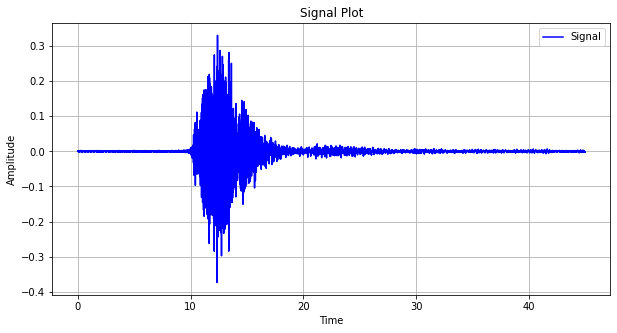

------------------------------



Signal length in seconds: 53.993703075805286 (s)


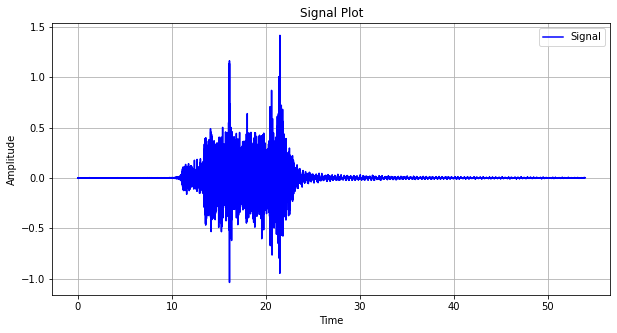

------------------------------



Signal length in seconds: 52.993460886413175 (s)


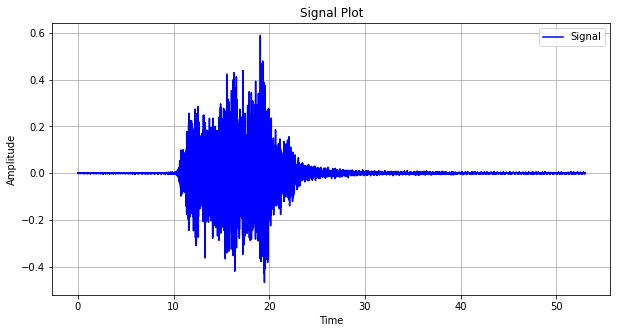

------------------------------



Signal length in seconds: 44.996367159118435 (s)


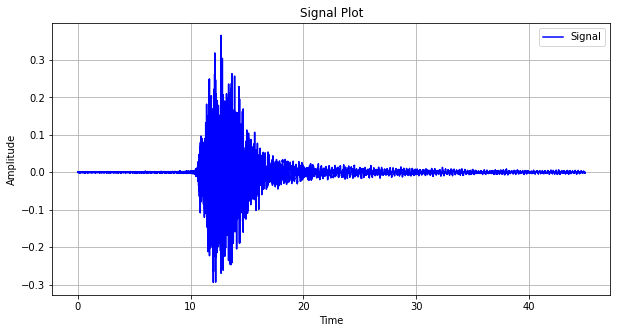

------------------------------



Signal length in seconds: 88.98038265923952 (s)


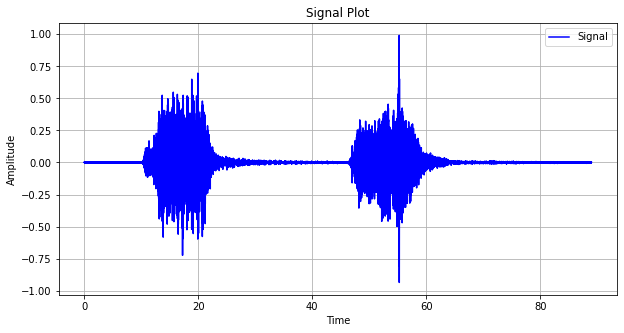

------------------------------



Signal length in seconds: 85.93727294744491 (s)


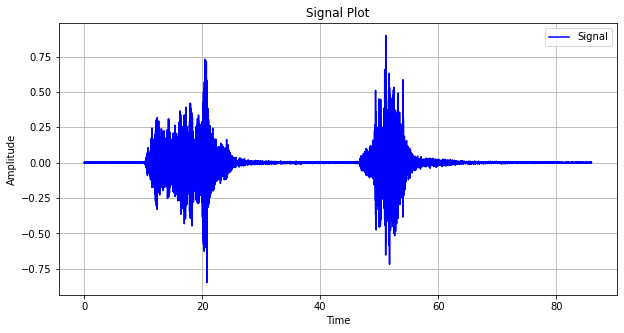

------------------------------



Signal length in seconds: 51.9944296439816 (s)


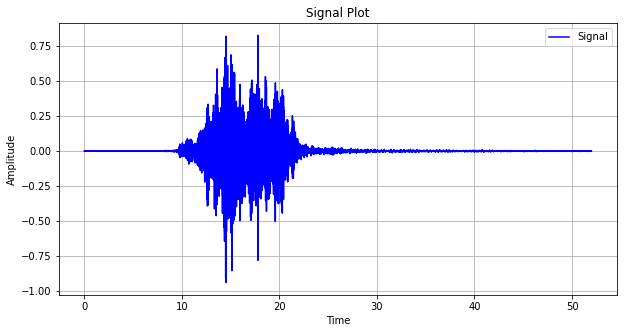

------------------------------



Signal length in seconds: 53.993703075805286 (s)


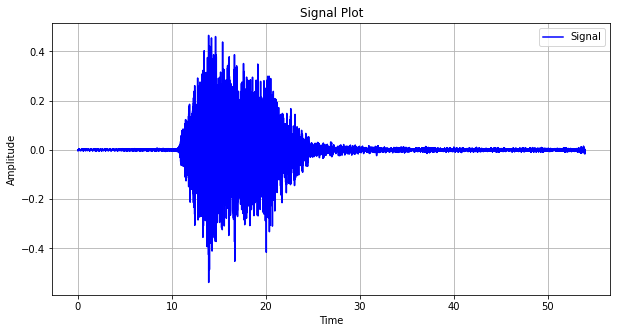

------------------------------



Signal length in seconds: 51.9944296439816 (s)


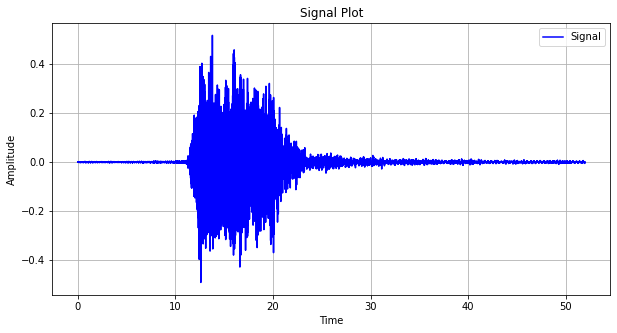

------------------------------



Signal length in seconds: 89.98062484863163 (s)


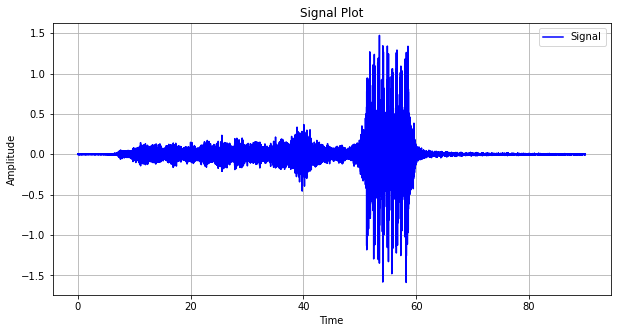

------------------------------



Signal length in seconds: 45.99660934851054 (s)


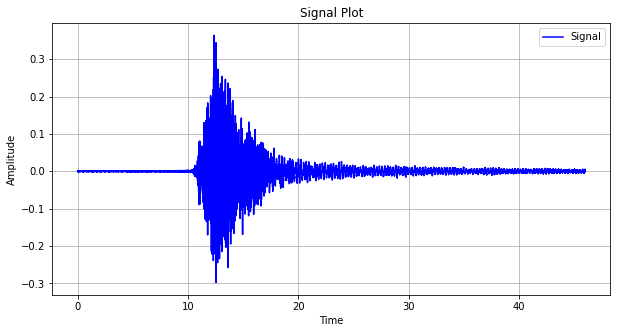

------------------------------



Signal length in seconds: 55.99297650762897 (s)


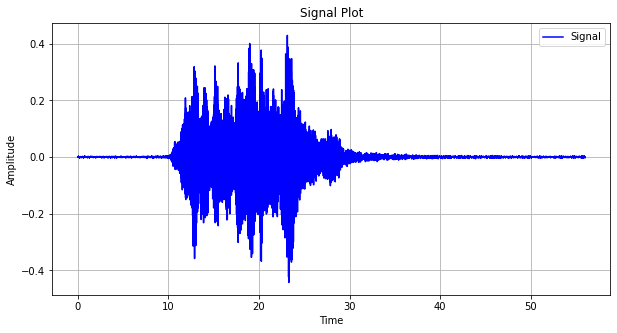

------------------------------



Signal length in seconds: 52.993460886413175 (s)


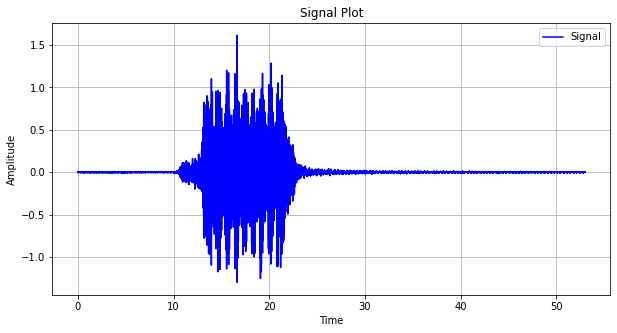

------------------------------



Signal length in seconds: 51.9944296439816 (s)


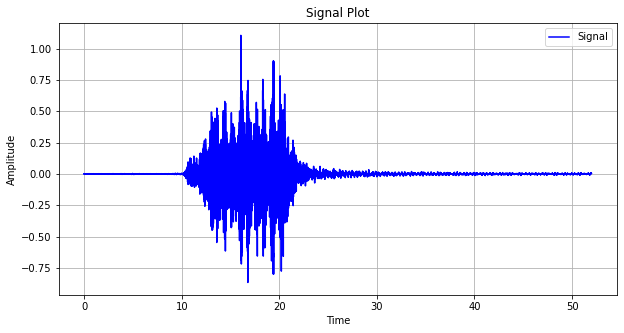

------------------------------



Signal length in seconds: 45.99660934851054 (s)


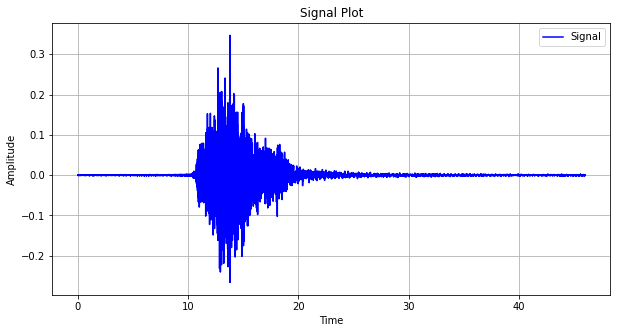

------------------------------



Signal length in seconds: 52.993460886413175 (s)


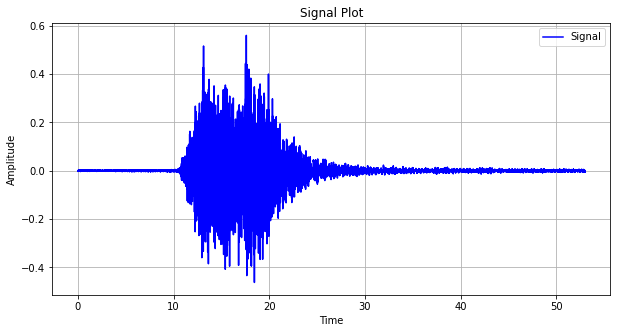

------------------------------



Signal length in seconds: 50.99418745458949 (s)


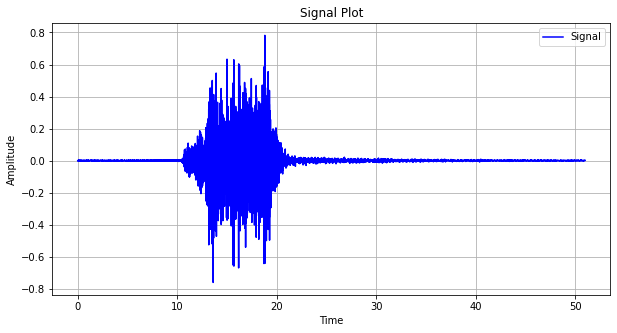

------------------------------



Signal length in seconds: 50.99418745458949 (s)


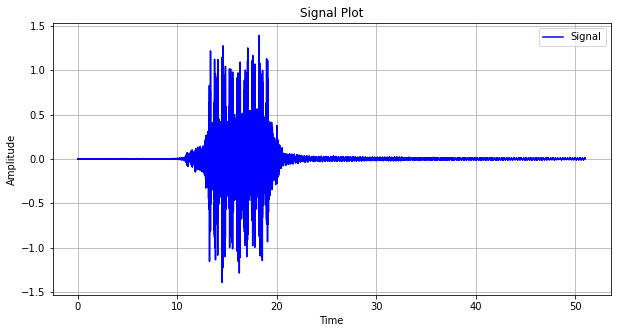

------------------------------



Signal length in seconds: 81.9835311213369 (s)


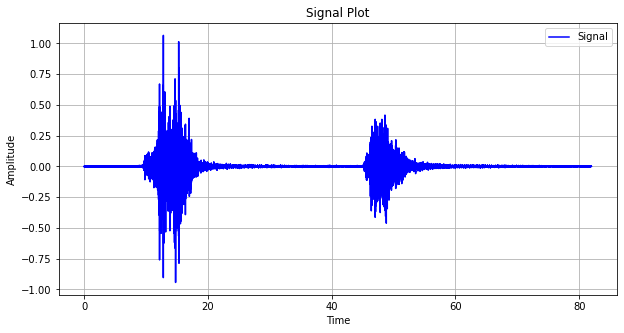

------------------------------



Signal length in seconds: 46.995640590942116 (s)


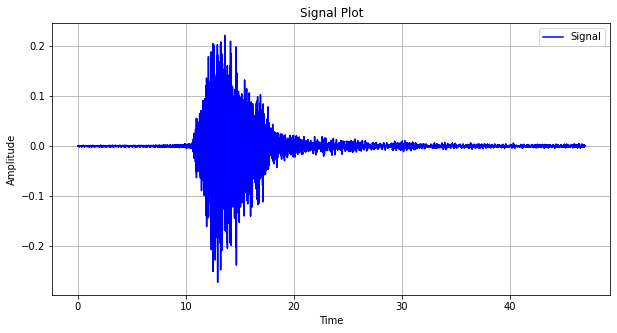

------------------------------



Signal length in seconds: 49.99515621215791 (s)


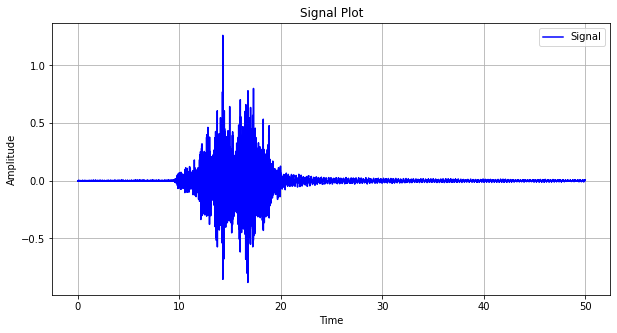

------------------------------



Signal length in seconds: 55.99297650762897 (s)


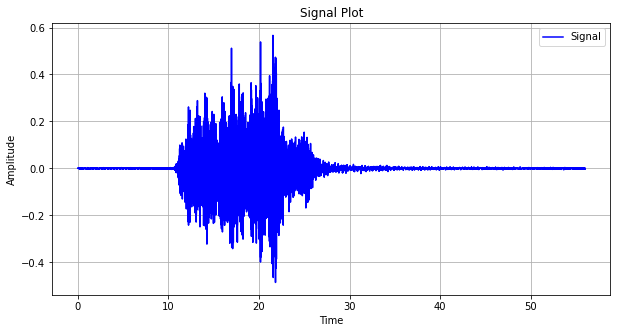

------------------------------



Signal length in seconds: 45.99660934851054 (s)


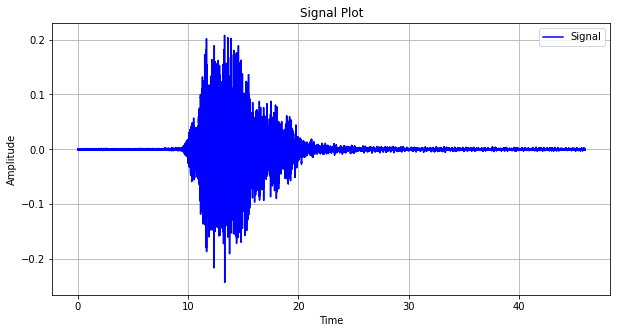

------------------------------



Signal length in seconds: 52.993460886413175 (s)


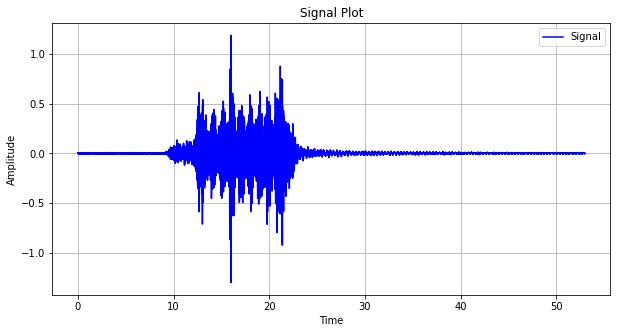

------------------------------



Signal length in seconds: 50.99418745458949 (s)


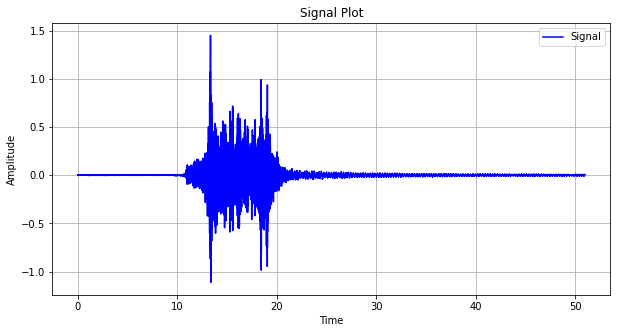

------------------------------



Signal length in seconds: 52.993460886413175 (s)


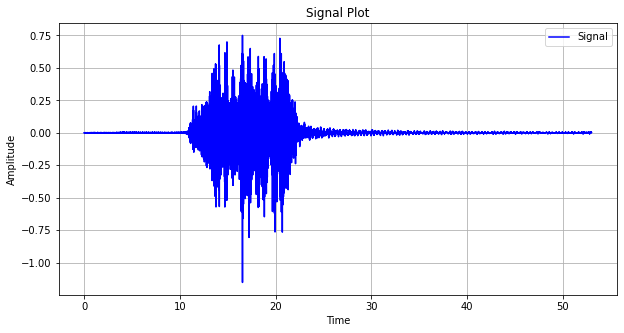

------------------------------



Signal length in seconds: 44.996367159118435 (s)


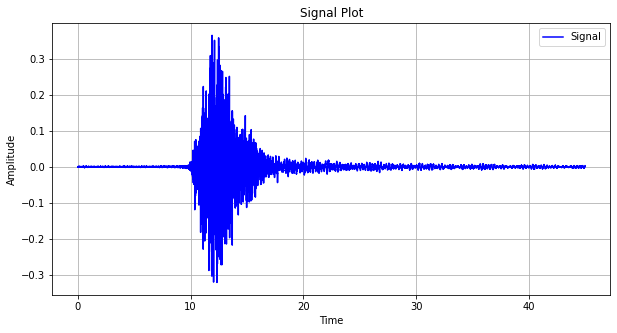

------------------------------



Signal length in seconds: 49.99515621215791 (s)


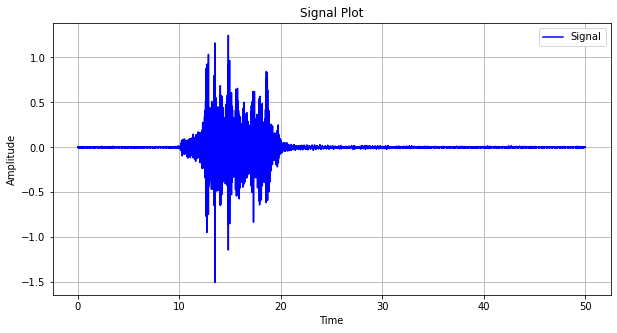

------------------------------



Signal length in seconds: 53.993703075805286 (s)


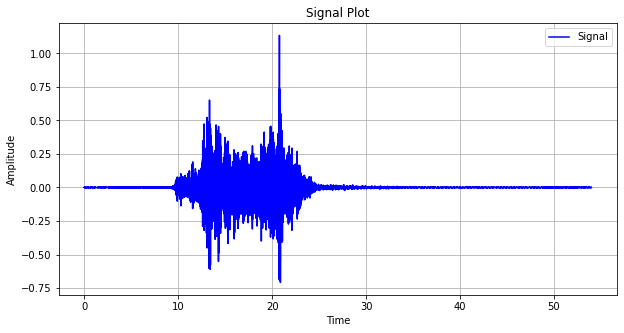

------------------------------



Signal length in seconds: 50.99418745458949 (s)


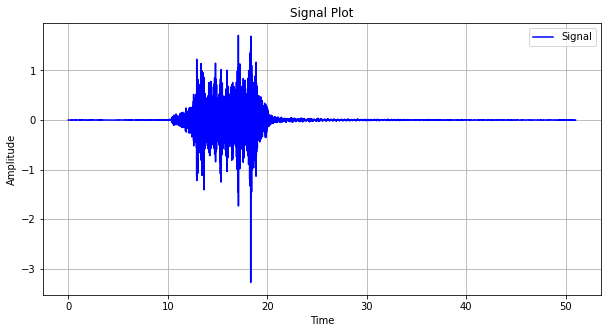

------------------------------



Signal length in seconds: 44.996367159118435 (s)


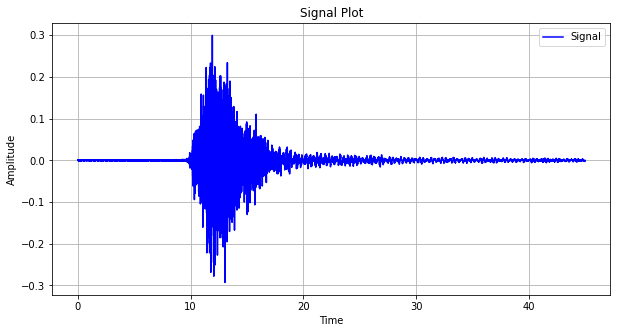

------------------------------



Signal length in seconds: 69.98789053039478 (s)


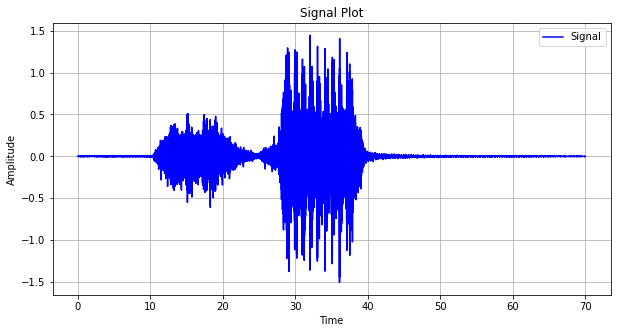

------------------------------



Signal length in seconds: 52.993460886413175 (s)


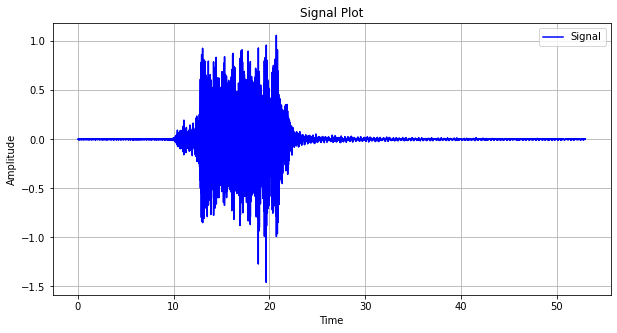

------------------------------



Signal length in seconds: 52.993460886413175 (s)


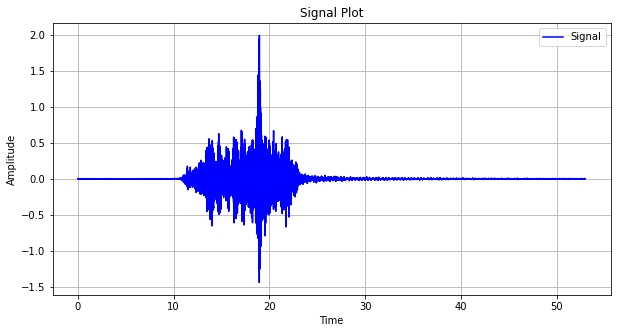

------------------------------



Signal length in seconds: 52.993460886413175 (s)


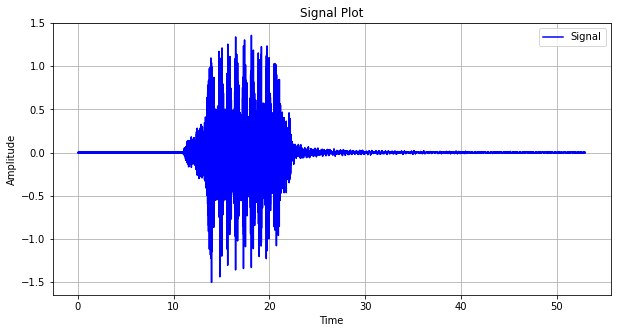

------------------------------



Signal length in seconds: 45.99660934851054 (s)


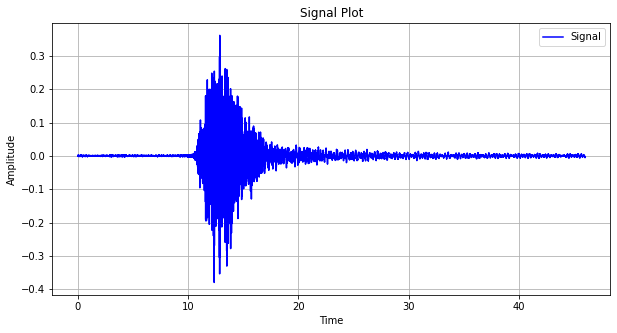

------------------------------



Signal length in seconds: 62.98982804553161 (s)


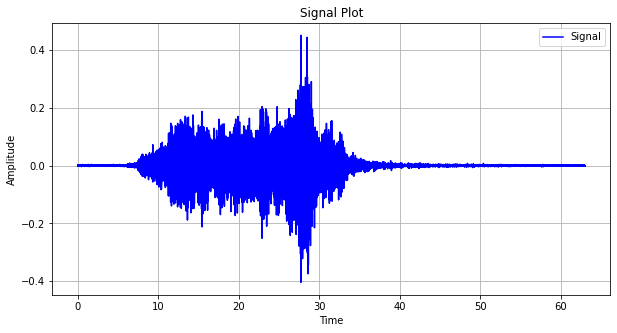

------------------------------



Signal length in seconds: 52.993460886413175 (s)


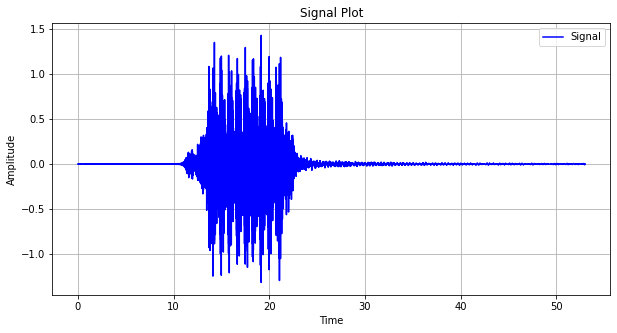

------------------------------



Signal length in seconds: 50.99418745458949 (s)


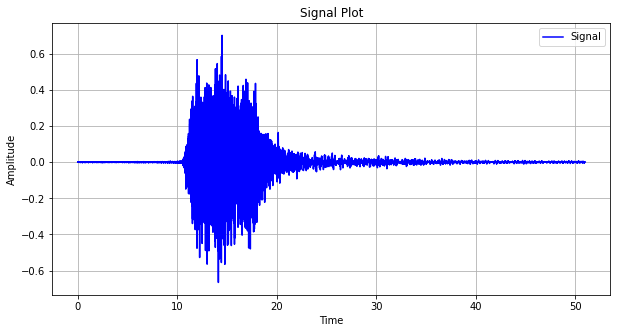

------------------------------



Signal length in seconds: 46.995640590942116 (s)


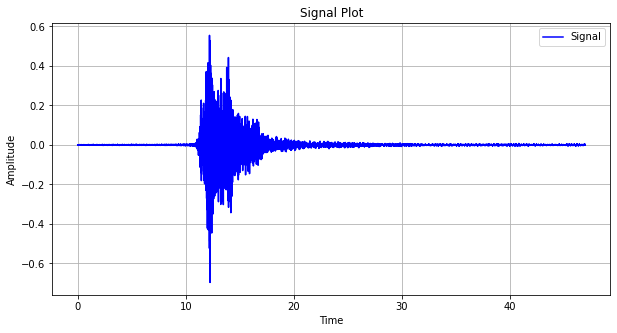

------------------------------



Signal length in seconds: 44.996367159118435 (s)


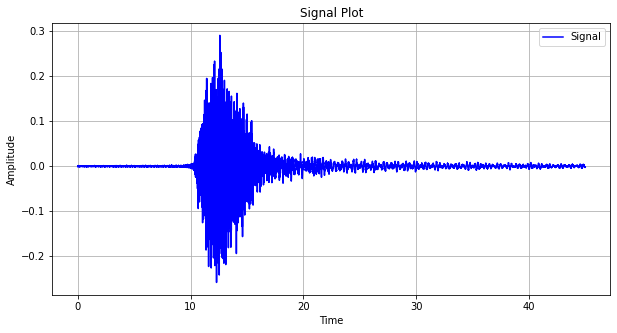

------------------------------



Signal length in seconds: 46.995640590942116 (s)


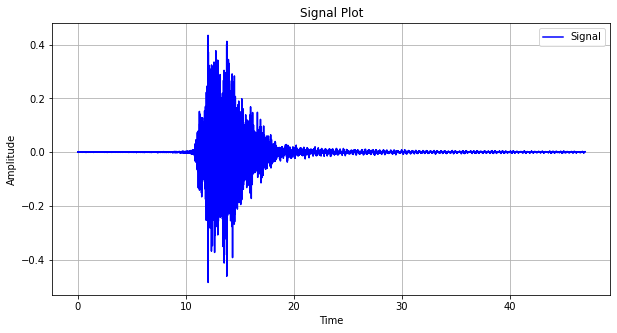

------------------------------



Signal length in seconds: 51.9944296439816 (s)


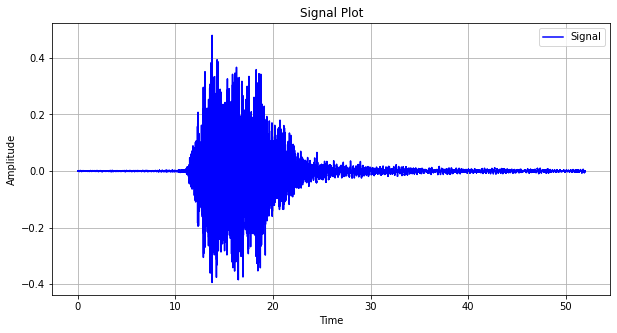

------------------------------



Signal length in seconds: 55.99297650762897 (s)


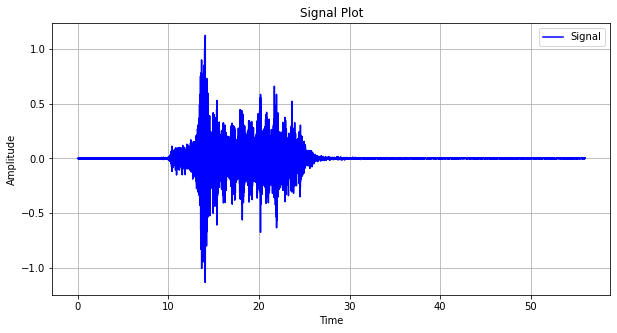

------------------------------



Signal length in seconds: 46.995640590942116 (s)


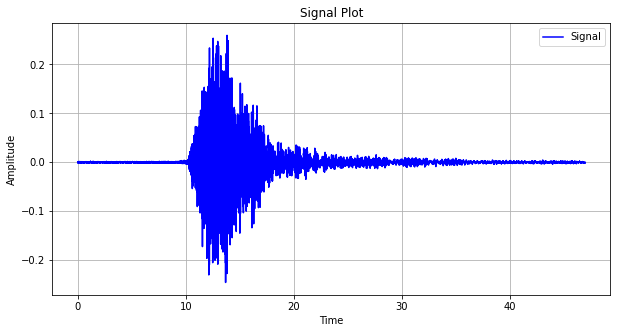

------------------------------



Signal length in seconds: 51.9944296439816 (s)


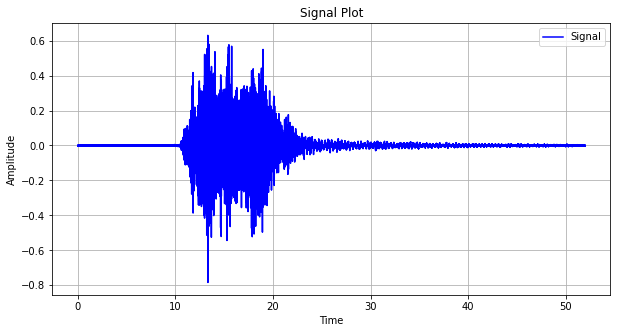

------------------------------



Signal length in seconds: 52.993460886413175 (s)


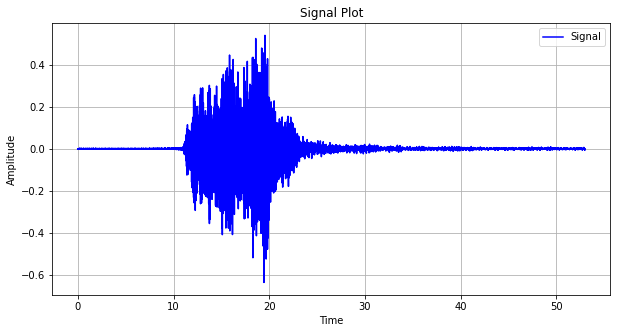

------------------------------



Signal length in seconds: 52.993460886413175 (s)


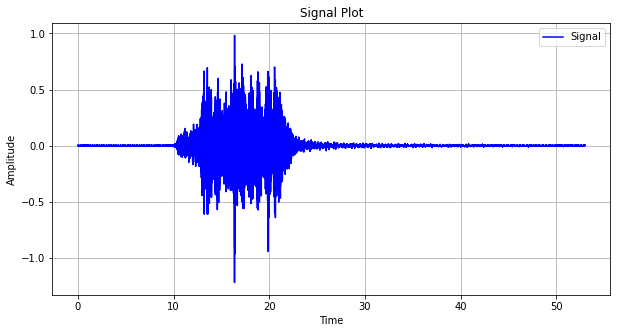

------------------------------



Signal length in seconds: 46.995640590942116 (s)


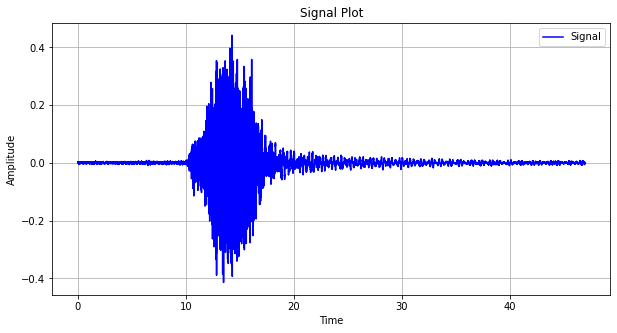

------------------------------



Signal length in seconds: 69.98789053039478 (s)


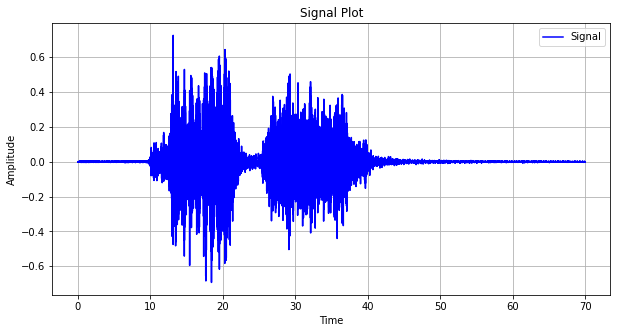

------------------------------



Signal length in seconds: 45.99660934851054 (s)


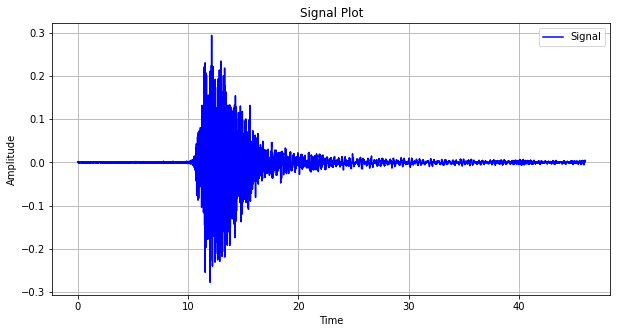

------------------------------



Signal length in seconds: 46.995640590942116 (s)


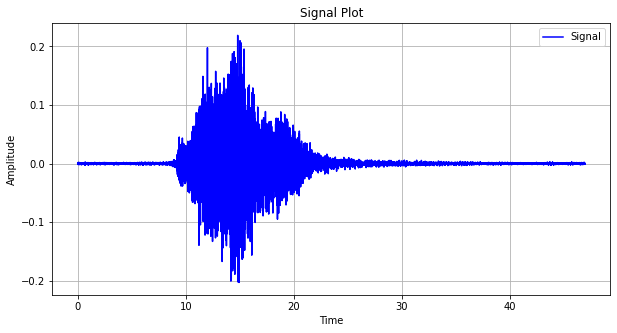

------------------------------



Signal length in seconds: 51.9944296439816 (s)


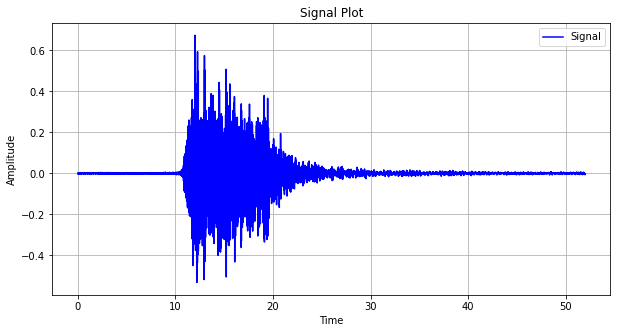

------------------------------



Signal length in seconds: 52.993460886413175 (s)


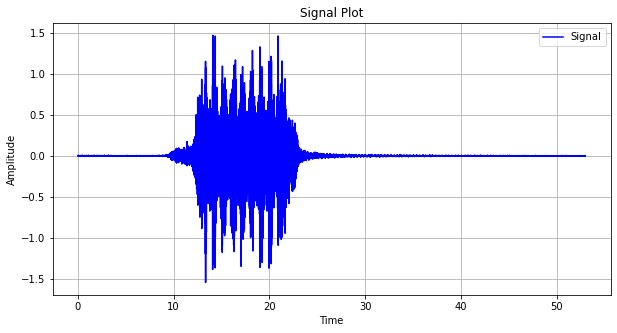

------------------------------



Signal length in seconds: 45.99660934851054 (s)


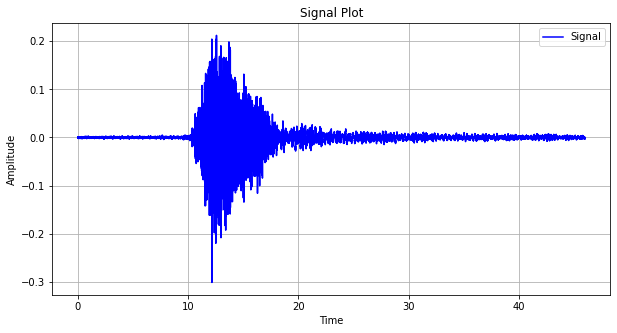

------------------------------



Signal length in seconds: 44.996367159118435 (s)


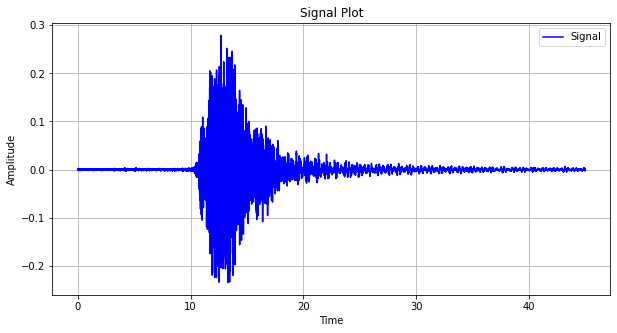

------------------------------



Signal length in seconds: 51.9944296439816 (s)


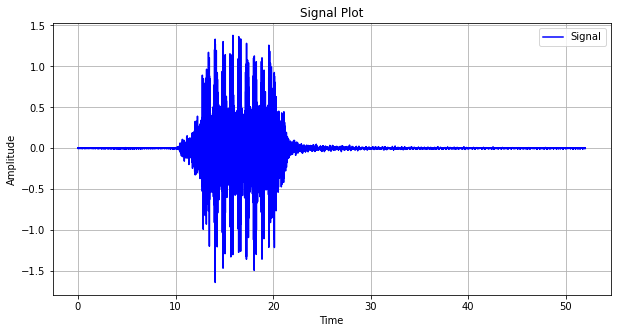

------------------------------



Signal length in seconds: 48.994914022765805 (s)


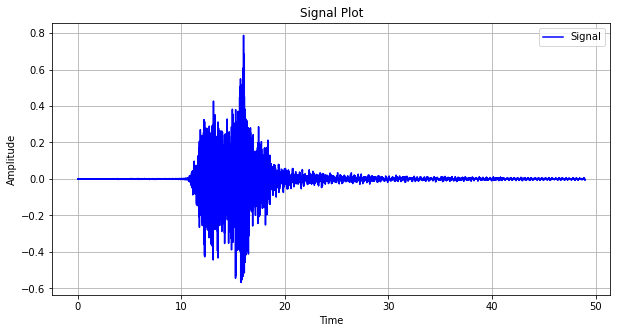

------------------------------



Signal length in seconds: 53.993703075805286 (s)


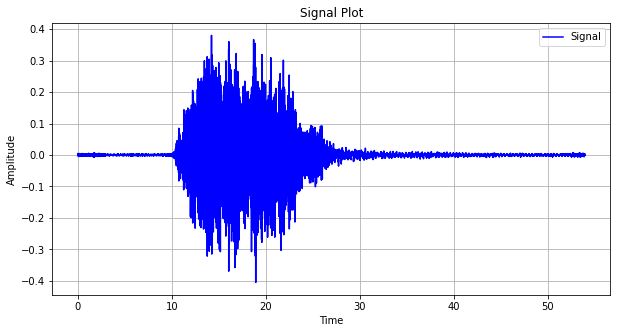

------------------------------



Signal length in seconds: 52.993460886413175 (s)


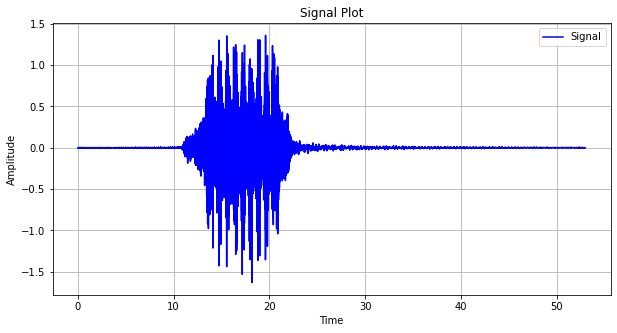

------------------------------



Signal length in seconds: 52.993460886413175 (s)


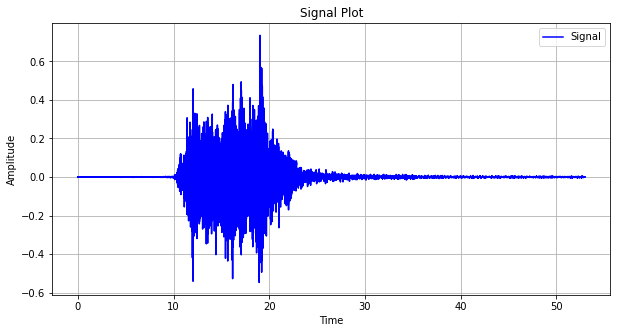

------------------------------



Signal length in seconds: 52.993460886413175 (s)


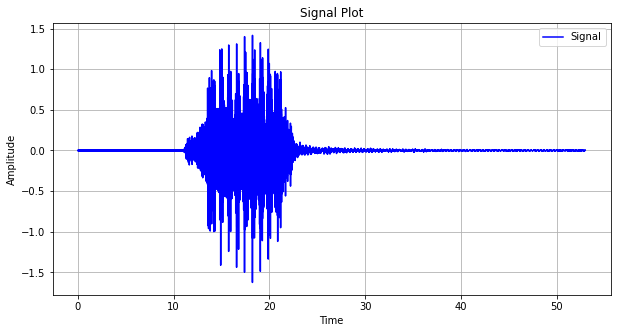

------------------------------



Signal length in seconds: 51.9944296439816 (s)


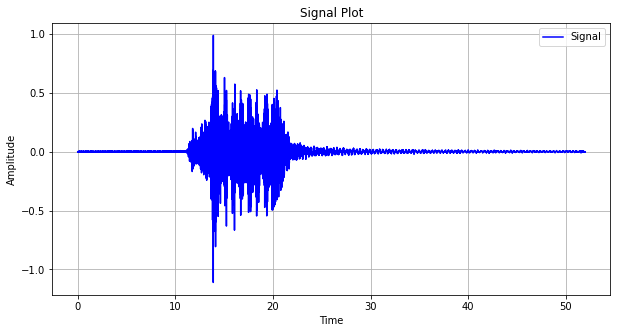

------------------------------



Signal length in seconds: 53.993703075805286 (s)


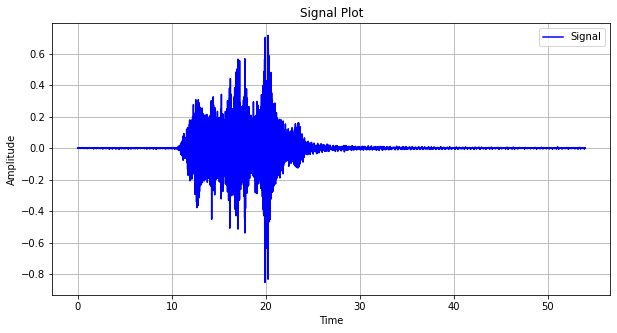

------------------------------



Signal length in seconds: 51.9944296439816 (s)


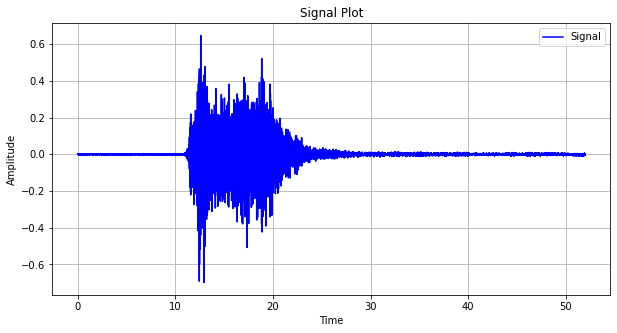

------------------------------



Signal length in seconds: 47.99588278033423 (s)


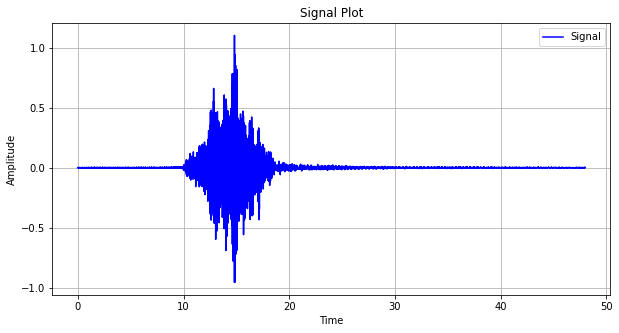

------------------------------



Signal length in seconds: 72.98619520465004 (s)


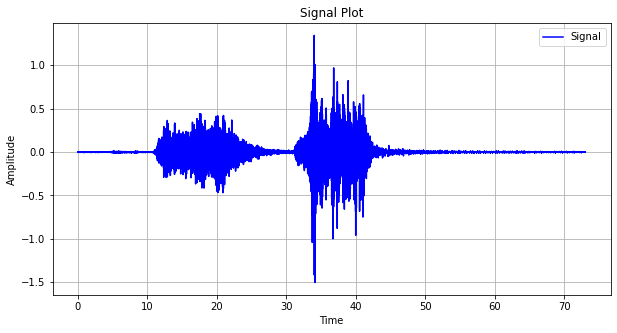

------------------------------



Signal length in seconds: 56.99200775006055 (s)


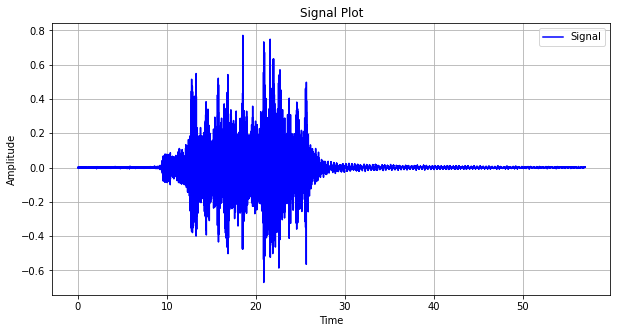

------------------------------



Signal length in seconds: 53.993703075805286 (s)


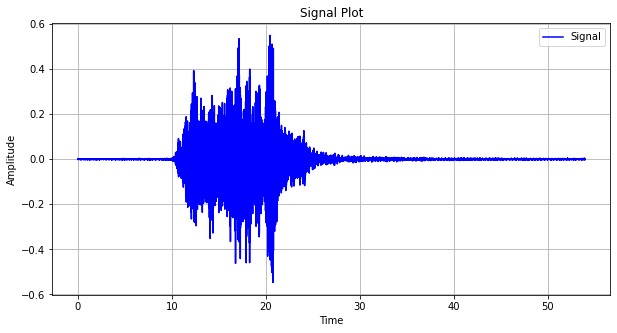

------------------------------



Signal length in seconds: 44.996367159118435 (s)


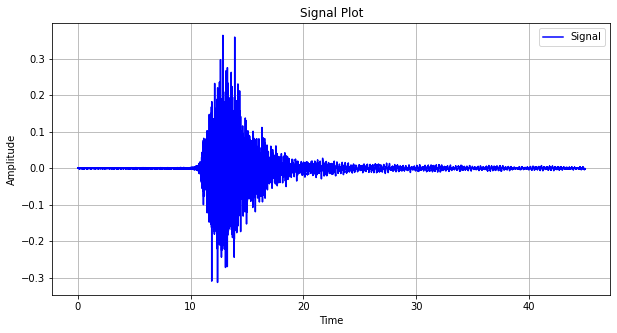

------------------------------



Signal length in seconds: 51.9944296439816 (s)


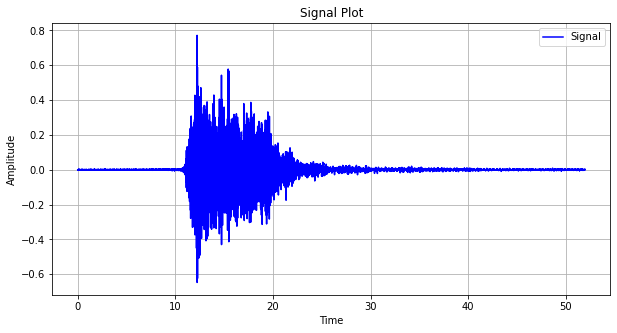

------------------------------



Signal length in seconds: 52.993460886413175 (s)


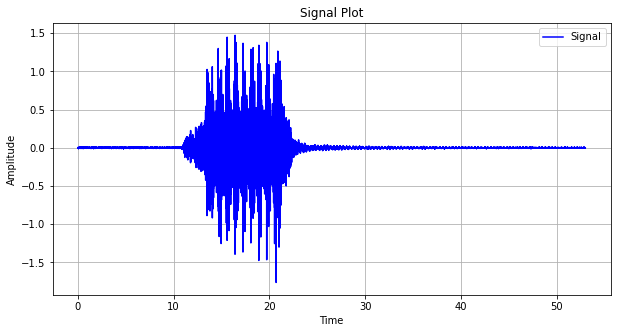

------------------------------



Signal length in seconds: 51.9944296439816 (s)


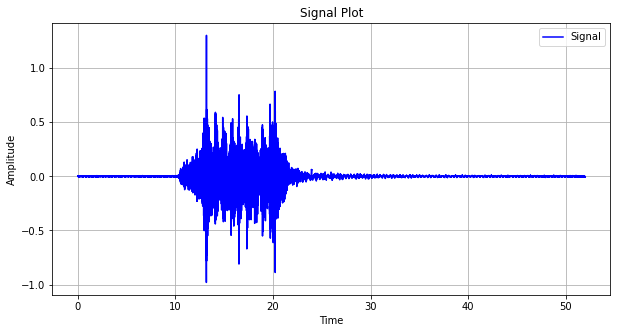

------------------------------





In [26]:
for key in columns_dict.keys():
    # Removing 5 successive zeros
    signal = remove_five_zeros(columns_dict[key])

    # Getting the length of signal in seconds
    print(f"Signal length in seconds: {len(signal)/fs} (s)")
    plot_signal(signal)
    print("-" * 30)
    print("\n\n")